# Block C, Year 1: Deep Learning Template

Name: Kade Widler

Number: 235585

Please, use this template implement and document your solutions to the Deep Learning tasks as described in the [DataLab Tasks](https://adsai.buas.nl/Year1/BlockC/DataLabTasks.html) page. If you have any questions, please, contact your mentor or the content responsible. 

## Important Notes:
- [ ] Please, rename the file to ```Deep-Learning-YOUR_NAME-STUDENT_NUMBER.ipynb```. 
- [ ] You are allowed to add as many Markdown/Python cells as you need. 
- [ ] You are required to provide textual explanations on all tasks. Please use the markdown cells to explain all your decisions while building your image classification model.
- [ ] If more iteration steps were performed while building your model, please add more iteration sections in the template.
- [ ] If certain Markdown/Python cells were not used, please remove them from the final version of your file. 
- [ ] You must replace the instructions in the template sections with your own content.
- [ ] Your work must be reproducible, meaning that we should be able to run your code in the template and get similar results to yours. Tip: use relative paths to load your data!
- [ ] Ensure that before you hand in the template, you press ```Restart & Run all```; we should be able to see the results of your code in the notebook (i.e., output cells).
- [ ] Ensure that your code in the template is ```error-free```. In other words, we should not see any error messages when we run your code.

## Task 3.1: Create an Image Dataset

### A: Dataset Creation

I created my data set using image eye. I looked up the prompts "iron deficiency koilonychia nails close-up", "biotin deficiency nails brittle close-up", "zinc deficiency nails white spots close-up", and "healthy nails close-up. I also added the prompts "toe nail" for each. I began to crop and arrange these images sorting them into seperate folders. I aimed at getting 100 or more images in each class, each being colored and high quality (filtering high fort image quality in image eye). For healthy nails, I used part of a kaggle data set. https://www.kaggle.com/datasets/josephrasanjana/nail-disease-image-classification-dataset?utm_source=chatgpt.com. I used part of this data set also cleaning and sorting for more balanced data.

### B: Dataset Cleaning

To clean my data set, I first removed duplicate or near duplicate images, and blurry images. This was because my project being used medically, would need to have very clear images. Both of these steps would greatly decrease the amount of useable data I had. I returned to scraping using image eye on bing to collect more data. I stopped when each of the categories was above 100 images each. However, there are imbalanced class sizes. I will have to implement several different methods to combat this.

I also decided to make the target_size (256, 256). This creates very high quality images that are essential in my project. The specific, nuanced details on nail images can make big differences when classifying between categories. This can be seen as the striations in nails of both the biotin and zinc classes. While these are similar, they can be distinguished close examination. 

Overall, the model must be as accurate as possible and learn very detailed patterns. While this slows down training, it is essential based on the business objective. Also, a majority of the target audience (pregnant women and elderly) who has a phone interested in discovering nutrient deficiencies, would likely have a camera of high quality. This data set also includes some lower quality images. It is essential the model is trained on a wide variety of instances to be generalizable. Additionally, the target group may be less experienced in taking high quality images centering the image around the nail and capturing the complete nail. In this project it is essential the data set is representative.

In [1]:
import os
import numpy as np
import skimage as ski

# Folder paths where the images of each class are stored
folder_paths = [
    "Nails_Data_No_Blurrr/biotin_deficiency",
    "Nails_Data_No_Blurrr/healthy_nails",
    "Nails_Data_No_Blurrr/iron_deficiency",
    "Nails_Data_No_Blurrr//zinc_deficiency"]

# Class labels for the images (same order as folder_paths)
class_names = [
    "biotin", 
    "healthy",
    "iron",
    "zinc"
]

# Target size to resize the images
target_size = (256, 256)

# Arrays to store the images (X) and class labels (y)
X = []
y = []

for i in range(len(folder_paths)):
    for filename in os.listdir(folder_paths[i]):
        file_extension = os.path.splitext(filename)[1]
        # Check if the file extension is an image extension 
        if file_extension == ".jpg" or file_extension == ".jpeg" or file_extension == ".png": 
            image_filename = os.path.join(folder_paths[i], filename)
            # Read the image file using scikit-image
            image = ski.io.imread(image_filename)
            # Resize the image to the target_size
            image_resized = ski.transform.resize(image, target_size)
            # Insert the image into array X
            X.append(image_resized)
            # Insert the class label into array y
            y.append(class_names[i])
            
# Convert of arrays into numpy arrays
X = np.array(X)
y = np.array(y)

In [2]:
X.shape

(527, 256, 256, 3)

In [3]:
y.shape

(527,)

### C: Final Dataset

**Data set sharepoint link https://edubuas-my.sharepoint.com/:f:/g/personal/235585_buas_nl/EgiR7NLEVtxGnIu1-NdlN78BEpLAIYqiisYFclFWChIV2A?e=xOdFkr **

Note: (In data collection, I had to revisite and collect some images. This caused some labeling issues as images were downloaded with the same name. When moving them to the same folder, some images are titled copy, however, they are not duplicates.)


Data splitting:
I started off making test_size = 1/10 means 10% of the data is allocated to the test set. I added Stratify=y_train to maintain class distributions within the new training and validation subsets. This is important when classes are imbalanced, as it preserves representativeness across splits. I also used random_state=0 to make the split reproducible. After separating out the test set, the remaining 90% is split again, with test_size = 1/9 to create a validation set that is 10% of the entire dataset. 

Overall, this two-step process yields a final distribution of approximately 80% training, 10% validation, and 10% testing.

Additionally, I divided the X splits by 255. This is because the images intensity was in range [0,255]. Dividng by 255 rescales these values to [0, 1]. These normalized input features are much easier for the neural networks to compute, with more steady inputs, increasing covergence speed.

In summary, converting the input array (X) to a floating-point type ensures that the division by 255 results in real (decimal) values rather than integers. Neural network operations (like weight updates) rely on floating-point arithmetic to capture small, continuous changes in pixel intensity.

Note: througout the template, sepcifically loading and processing the data, I make sure to regularly visualize data points. This is to make sure I am confident the changes I am making create workable data solutions. This also creates a connect between the specific code I am creating and the data that this is running on. There can be large disconnects of this in programming, helping me to focus on the business objectives of my project, maintaining data quality.

### D: Load and Split

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 1/10,
                                                    random_state = 0,
                                                    stratify=y)
                                                    
print(X_train.shape, X_test.shape)

(474, 256, 256, 3) (53, 256, 256, 3)


In [5]:
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  test_size = 1/9,
                                                  random_state = 0,
                                                  stratify=y_train)
                                                  
print(X_train.shape, X_val.shape, X_test.shape)

(421, 256, 256, 3) (53, 256, 256, 3) (53, 256, 256, 3)


Tested to view image before and after float and normalization

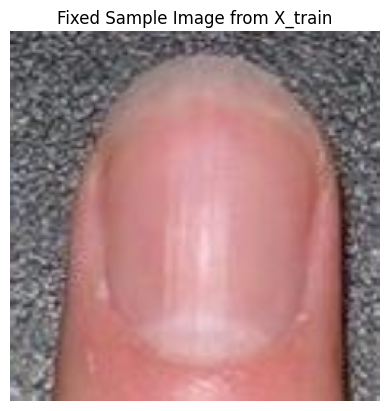

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Pick a sample from X_train
sample_image = X_train[10]  # Select an image
plt.imshow(sample_image)
plt.axis("off")  # Hide axes for better visualization
plt.title("Fixed Sample Image from X_train")
plt.show()


In [7]:
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

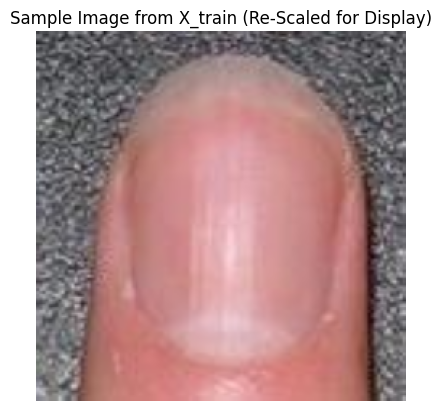

In [8]:
sample_image = X_train[10]
plt.imshow(sample_image * 255.0)  # Scale values back for visualization
plt.axis("off")
plt.title("Sample Image from X_train (Re-Scaled for Display)")
plt.show()

## Task 3.2: Calculate Baselines

I must beat random accuracy of 26%. I calculated this by calculating the accuracy of each class. I did this by taking the number of instances in each sample dividing by the total data set and then multiplying by the probability of each class(percentage of total of each class). After doing this for each class I then summed up these accuracy percentages which created the total random guess accuracy. **I basically just squared the probability of each class and added them all up in a confusing way.**

***Retake: I took many unnecessary steps because I did not understand the Week 3 Data Lab page- https://adsai.buas.nl/Study%20Content/Deep%20Learning/4.%20DataLab%20I%20Multilayer%20Perceptrons.html#5-datalab-task-32-baselines that gave an example with incorrect probabilities that you would guess each class based on their likely-hoods. To fix this, I removed several unnecessary steps and left notes showing I understand the reasoning behind the calculations.***

### A: Random Guess Accuracy

In [1]:
zinc = 130
iron = 178
healthy = 104
biotin = 105
zinc, iron, healthy, biotin # number of instances in each class

(130, 178, 104, 105)

In [2]:
total_samples = (zinc + iron + healthy + biotin)
total_samples # data set size

517

In [3]:
zinc_prob = zinc / total_samples
iron_prob = iron / total_samples
healthy_prob = healthy / total_samples
biotin_prob = biotin / total_samples

print(zinc_prob, iron_prob, healthy_prob, biotin_prob) # out of total data set, percentage that belongs to each class.

zinc_prob + iron_prob + healthy_prob + biotin_prob

0.2514506769825919 0.344294003868472 0.2011605415860735 0.20309477756286268


1.0

In [9]:
#random guessing based on data distibition 
zinc_accuracy = zinc_prob * zinc_prob # because zinc takes up 25% of the data set, you would guess zinc 25% of the time
iron_accuracy = iron_prob * iron_prob
healthy_accuracy = healthy_prob * healthy_prob
biotin_accuracy = biotin_prob * biotin_prob
zinc_accuracy, iron_accuracy, healthy_accuracy, biotin_accuracy # you have to multiply size of class by how likely you are to guess it

(0.06322744295500377,
 0.1185383610997834,
 0.0404655634912024,
 0.04124748867330867)

In [10]:
total_random_guess_accuracy = zinc_accuracy + iron_accuracy + healthy_accuracy + biotin_accuracy
total_random_guess_accuracy

0.26347885621929823

### B: Basic Multilayer Perceptron Accuracy

Preprocessing: 
I one hot encoded the labeled variable so that the model could associate and image with a specfic class by turning y_train into a  multi-dimensional binary matrix. This way the model could train correctly using the loss function categorical crossentropy (ensuring each image is linked to a distinct category). 

I also flattened the data, reshapping the data between [0], -1, preprocessing my data for multilayer perception implementation. MLP models require a one-dimensional feature vector for each sample. These steps are essential to feed into the model to make the data readible to the machine, so that the model is able to compute, find patterns, and make accurate predictions (do what it is supposed to). 

Also, due to the imbalanced nature of my classes I added the sklearn compute_class_weight based on the encoded data. This was useful so that the model created balance weights across classes. These weights are applied during training to give more emphasis to the minority classes and less to the majority classes. Weights are applied to y_train_encoded, not y_train or y_train_one_hot because they provide a simple, one-dimensional array where each element is an integer representing a class (y_train is a string type).

#### I: Preprocessing

In [15]:
# Add your code to preprocess your dataset for the basic MLP model.
print(X_train.shape, X_val.shape, X_test.shape)

(421, 256, 256, 3) (53, 256, 256, 3) (53, 256, 256, 3)


In [16]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Step 1: Fit the encoder on training labels only
encoder = LabelEncoder()
encoder.fit(y_train)

# Convert training labels
y_train_encoded = encoder.transform(y_train)
y_train_onehot = to_categorical(y_train_encoded)

# Convert test labels
y_test_encoded = encoder.transform(y_test)
y_test_onehot = to_categorical(y_test_encoded)

# Convert validation labels
y_val_encoded = encoder.transform(y_val)
y_val_onehot = to_categorical(y_val_encoded)

print("Training labels one-hot shape:", y_train_onehot.shape)
print("Test labels one-hot shape:", y_test_onehot.shape)
print("Validation labels one-hot shape:", y_val_onehot.shape)


2025-04-10 09:54:19.194619: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744278859.206605   33897 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744278859.210207   33897 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-10 09:54:19.225585: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Training labels one-hot shape: (421, 4)
Test labels one-hot shape: (53, 4)
Validation labels one-hot shape: (53, 4)


In [17]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)

In [18]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute class weights using the integer-encoded training labels
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train_encoded),
    y=y_train_encoded
)
class_weight_dict = dict(zip(np.unique(y_train_encoded), class_weights))
print("Class weights:", class_weight_dict)

Class weights: {0: 1.2529761904761905, 1: 1.1565934065934067, 2: 0.7411971830985915, 3: 1.0120192307692308}


#### II: MLP Architecture 

Architecture: 
I created a very basic multilayer perception model with the first input layer being very large to try and encompass as much as the image as possible. There was not enough memory space to match the input shape of the data (196608), so I made it as large as possible based on memory space.

I also found that two middle layers including 64 neurons were most successful. This included the relu activation to introduce non linearity. I chose to use the relu activiation because it works particularly well for multiclassification problems, learning complex, non-linear patterns in the data. Relu is less computationally expensive than tanh and sigmoid because it involves simpler mathematical operations making the initial training processes faster. Relu only takes in positive inputs so the gradient doesn't diminish for positive activations. When the gradients vanish, the early layers in the network learn very slowly or not at all, making it difficult for the model to converge on a good solution. Therefore, the use of relu was essential in this first model because I wanted to ensure the earlier layers used as much of the images as possible.

I used the softmax activation because it is essential for multi-class classification as it converts the network’s outputs into a probability distribution, allowing the model to predict the likelihood of each class.

In [19]:
from keras.models import Sequential
from keras.layers import Dense

def build_model(print_summary=False):
    model = Sequential()
    model.add(Dense(526, input_shape=(256 * 256 * 3,), activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(4, activation='softmax'))

    if print_summary:
        model.summary()

    return model

model = build_model(print_summary=True)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-10 09:54:21.443764: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0000 00:00:1744278861.444282   33897 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46866 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:e1:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 526)            │   103,416,334 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        33,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,454,482 (394.65 MB)

 Trainable params: 103,454,482 (394.65 MB)

 Non-trainable params: 0 (0.00 B)

I have  not compiled model yet so summary is below. I did this stucture in order to create a for loop testing several learning rates.

#### III: MLP Training

Training: I trained the model with the optimizer adam, This is because this optimizer is best suited for fast, efficient learning, typically converging quickly. This fast convergence was essential to reduce training time, resource usage, and increase model refinement efficiency. I used the categorical crossentropy because my predicted value or labels were one hot encoded. Categorical crossentropy directly measures the difference between the predicted probability distribution and the true distribution (one-hot vectors), ensuring that each class’s probability is properly accounted for. Additionally, I used the accuracy metric as a baseline. Accuracy is a straightforward measure of how often the model predicts the correct class, providing a clear initial benchmark for comparing model iterations. I would use this a very basic insight into the model, computing other more revealing metrics in model evaluation.

Next, I added early stopping to make sure the model wouldn't overfit. A patience of 10 prevents overfitting by halting training when the validation loss stops improving; letting the model reach absolute minima in lower learning rates. Early stopping monitors val loss to make sure the model moved in the gradient direction for both the training and test set. 

I found that a batch size of 32 was a fair value to create fast training as weights were adjusted more frequently, increasing convergence speed. 

I added the class weights and callbacks to training.

I visualied the val_loss compared to the loss to illustrate possible overfitting and how quickly the model moved towards the gradient. I also modeled val accuracy by the accuracy to illustrate how effective model was. 

In [20]:
# Add your code to train the MLP model using early stopping and different learning rates.
from tensorflow.keras.optimizers import Adam

def compile_model(model, lr):
    opt = Adam(learning_rate=lr)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

model_1 = compile_model(model, lr=0.001)

In [21]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 526)            │   103,416,334 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        33,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,454,482 (394.65 MB)

 Trainable params: 103,454,482 (394.65 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [23]:
H = model_1.fit(X_train_flat, y_train_onehot, epochs=500, batch_size=32, 
              validation_data=(X_val_flat, y_val_onehot),
              class_weight=class_weight_dict,
              callbacks=early_stopping)

Epoch 1/500


I0000 00:00:1744278864.362287   34555 service.cc:148] XLA service 0x7fed9c00b410 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744278864.362344   34555 service.cc:156]   StreamExecutor device (0): NVIDIA RTX A6000, Compute Capability 8.6
2025-04-10 09:54:24.410120: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1744278864.509173   34555 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-04-10 09:54:25.760243: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_190', 32 bytes spill stores, 32 bytes spill loads

2025-04-10 09:54:25.771406: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_190', 16 bytes spill st

10/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2650 - loss: 1.4280

2025-04-10 09:54:28.043172: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_190', 12 bytes spill stores, 12 bytes spill loads



14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.2577 - loss: 1.4218

2025-04-10 09:54:30.469538: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_49', 20 bytes spill stores, 20 bytes spill loads

2025-04-10 09:54:30.586703: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_49', 268 bytes spill stores, 272 bytes spill loads



14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 335ms/step - accuracy: 0.2561 - loss: 1.4208 - val_accuracy: 0.2642 - val_loss: 1.4335
Epoch 2/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2826 - loss: 1.3763 - val_accuracy: 0.3396 - val_loss: 1.3910
Epoch 3/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3339 - loss: 1.3596 - val_accuracy: 0.2830 - val_loss: 1.4553
Epoch 4/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2680 - loss: 1.3817 - val_accuracy: 0.2830 - val_loss: 1.3522
Epoch 5/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3598 - loss: 1.3094 - val_accuracy: 0.3208 - val_loss: 1.3453
Epoch 6/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3334 - loss: 1.2807 - val_accuracy: 0.3019 - val_loss: 1.4189
Epoch 7/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.3440 - loss: 1.2993 - val_accuracy: 0.3208 - val_loss: 1.3382
Epoch 8/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3327 - loss: 1.2737 - val_accuracy: 0.4717 - val_

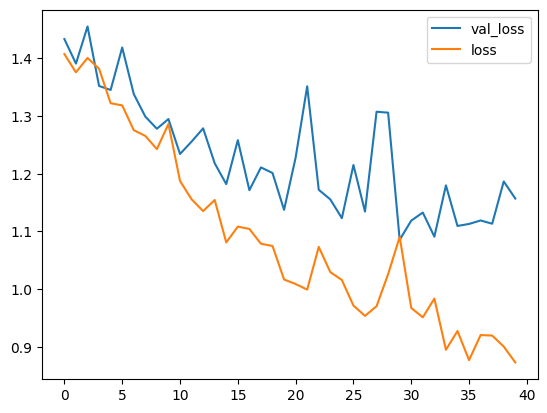

In [25]:
import matplotlib.pyplot as plt
def loss_plotter(H):
    plt.clf()
    plt.plot(H.history['val_loss'], label='val_loss')
    plt.plot(H.history['loss'], label='loss')
    plt.legend()
    plt.show()

loss_plotter(H)

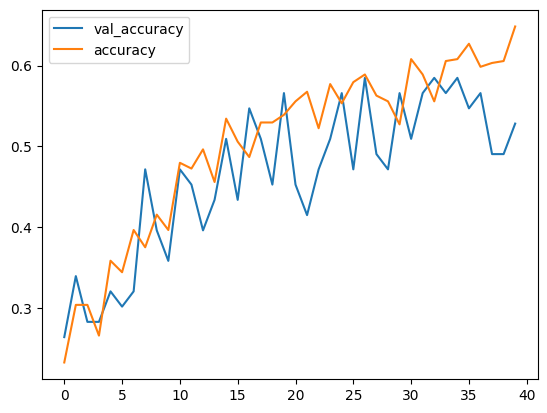

In [26]:
def accuracy_plotter(H):
    plt.clf()
    plt.plot(H.history['val_accuracy'], label='val_accuracy')
    plt.plot(H.history['accuracy'], label='accuracy')
    plt.legend()
    plt.show()
    
accuracy_plotter(H)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step  
              precision    recall  f1-score   support

           0       0.60      0.27      0.38        11
           1       0.57      0.73      0.64        11
           2       0.64      0.50      0.56        18
           3       0.50      0.77      0.61        13

    accuracy                           0.57        53
   macro avg       0.58      0.57      0.55        53
weighted avg       0.58      0.57      0.55        53



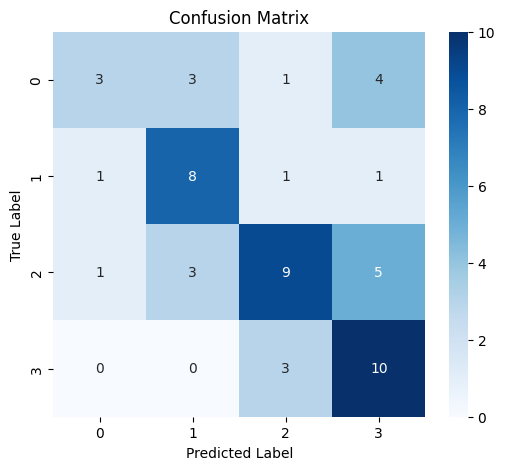

In [226]:
from sklearn.metrics import classification_report
import numpy as np

# Get predictions
y_pred = model_1.predict(X_test_flat)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert to class labels
y_true_classes = np.argmax(y_test_onehot, axis=1)  # Convert test labels to class indices

# Print detailed classification report
print(classification_report(y_true_classes, y_pred_classes))
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(4), yticklabels=range(4))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

#### IV: MLP Evaluation

Before testing learning rates: 
accuracy: 0.5063 - loss: 1.2450 

After testing learning rates:
best: 0.001 accuracy: 0.6337 - loss: 0.8992 - val_accuracy: 0.5472 - val_loss: 1.0569

The results of the evaluation of my model are normal. Around a 51% model is very achievable with a very basic multilayer perception model. Class-wise performance: Varies significantly. Class 0 has low precision (0.44) and recall (0.40), while Class 3 has higher recall (0.75) but moderate precision (0.50). Class 2 has decent precision (0.60) but low recall (0.33). These results illustrate that there is too little data in the model. Data augmentation will help tremendously in model performance.

Business objective alignment: This model achieves roughly 50% accuracy on a challenging multi-class classification task for nail nutrient deficiencies. Although it is only a baseline, the results demonstrate that the multilayer perceptron can learn meaningful patterns from the data. By incorporating class weights and carefully tuning hyperparameters (learning rate, batch size), the model balances performance across multiple deficiency classes.

Future enhancements such as more sophisticated architectures (convolutional neural networks), data augmentation, and hyperparameter optimization can further improve accuracy and generalizability. This initial model serves as a solid proof of concept, supporting the ultimate goal of an app that provides reliable, data-driven insights into users’ nail health and potential nutrient deficiencies.

Overall, the model slightly overfit in both visualizations but achieved a modest accuracy of around 50%. I evaluated the model with a confusion matrix and classication report showing balanced errors across the entire model. These are normal for a multilayer perception model, showing that the model was working. I was satisifed with the results of this model to create a strong, workable baseline. After testing multiple learning rates and found 0.001 was most successful. **I used the same code as the WL2 notebook.**

**Retake**: When looking at the visualizations for loss and accuracy, the “bouncing” indicates the model is taking very noisy gradient steps—overshooting minima, then correcting itself, then overshooting again. The training-validation gap suggests the model is tightly overfitting to high-variance updates. This means the basic MLP model is too simple to capture the complexities of detecting the subtle features necessary to detect nutrient deficiencies in nails. Even if I trained longer, or created an optimal architecture, I would likely see the same oscillations shrinking in amplitude—never the smooth descent or tight train/val alignment needed for reliable generalization. 

Next, the evaluations for the classification report and confusion matrix change greatly between trainings. This indicates a basic MLP model fails classify images where nuanced, subtle features are so important. It “lumps” many different nail appearances together and overfits specific patterns (hinted by the relatively higher precision and recall on the larger classes).

This base MLP serves as a strong foundation because CNN's which capture feature detection should be much more successful in my use case. In future iterations, I should continually improve, receiving more uniform classification metrics, and a higher overall accuracy compared to this model.

In [31]:
model_1.evaluate(X_test_flat, y_test_onehot)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5649 - loss: 1.0810 


[1.098402500152588, 0.5660377144813538]

### C: Human-Level Performance Accuracy

https://forms.office.com/Pages/DesignPageV2.aspx?origin=NeoPortalPage&subpage=design&id=m1gzCjYA6E-oKT7Qkmr4hlziVVIH8pJJtA1RxDjk8UtUMjdQU0UzUVNIT0Q2MFE2U1RGRE9GTks3SS4u&analysis=true


Overall accuracy: 
I got five participants to participate in  my survery of 40 questions with 10 questions per class. Out of these five, the average score was 24/40. This makes the average 60% (calculated by google form). This is the average of people who were recently introduced to these deficiencies and how to detect them in nails. While 60% is a strong target for my model, the percentage that is possible for both medical professionals and my models is much higher. It is interesting that this is the around the percentage I got with my basic multilayer perception model. 

Class Accuracy:
I calculated the class accuracy by summing the amount of correct responses each participant had per class (10 questions per class) and dividing by the amount of questions they answered per class (10 * 5 = 50). For example, when calculating the healthy class: Participant 1 had 9 correct, P2 had 7, P3 had 8, P4 had 5, and P5 had 6. This yielded a total of 35 and then dividing it by 50 = 70% accuracy.

Biotin Accuracy: 31/50 = 62%

Health Accuracy: 35/50 = 70%

Iron Accuracy: 21/50 = 42%

Zinc Accuracy: 33/50 = 66%

When creating my models, health nails were clearly easiest to classify, regularly having higher classification statistics (this same pattern is proven through my HLP test). This suggests that both humans and the model can easily identify nails that are free of visible symptoms. This may be because healthy nails are more consistent and distinct in appearance. On the other hand, in modeling, specficially with CNNs, the iron and zinc classes underpreformed immensely with the zinc class being the worst in class performance by a large amount. Based on the results of my MLP model, these same patterns are not illustrated, This is interesting due to the similarities in the iron and zinc classes (appearance of brittle or lines on nails). This suggests that humans may be picking up on subtle cues or patterns in nail imagery that my model isn’t capturing well. This could be lack of fine-grained feature extration or indicate a small/unclean dataset. On the other hand, iron preformed suprisingly poorly on the HLP while it preforms well in the MLP. This may be due to the fact iron deficiency symptoms in nails are subtle or inconsistent, making it genuinely hard to classify. This could also indicate poor data quality, or a class definition issue, meaning the classes features are not clearly distinguishable compared to other classes like biotin or zinc. This is true based on the wide range of symptoms that can occur in iron deficient nails such as spooning, sunken, or thin nails.

Overall, while it is interesting analyzing the results of this HLP testing, the results are problematic to successfully generalize. These HLP accuracy statistics are not representative as a baseline because an SME(subject matter expert) is essential in medical classifications (my model should be compared to a trained professionals who do this task). Additionally, by increasing the time spend to where labelers could understand the certain classes and agree on labels, the overall accuracy would be much higher. Additionally, the class accuracy would be more representative of MLP classification statistics.

In the end, HLP is a very important baseline that illustrates what is possible in machine learning. By taking time to produce high quality labels, the machine learning solution can be much more applicable. It is important to understand HLP because often HLP can be comparing inspector to baseline: comparing how one person labels data according to another. This remains true for the results of my HLP implementation.


## Task 3.3: Basic Convolutional Neural Network (Iteration 1)

### A: Preprocessing

Same preprocessing execept for the multilayer perception model: one-hot encoding labels, applying class weights, and normalizing image data, except no data flattening. This is because CNN's must look at the specific patches of the model and these must stay intact, so the flattened layout is not possible. Instead, they are fed into convolutional layers in their original shape, such as (height, width, channels).

Business Alignment:
By preserving image structure, CNNs can better capture subtle visual indicators in nails that might signal specific nutrient deficiencies. This capability supports my objective of delivering more accurate, reliable diagnoses through detection of subtle features.

In [34]:
import os
import numpy as np
import skimage as ski

# Folder paths where the images of each class are stored
folder_paths = [
    "Nails_Data_No_Blurrr/biotin_deficiency",
    "Nails_Data_No_Blurrr/healthy_nails",
    "Nails_Data_No_Blurrr/iron_deficiency",
    "Nails_Data_No_Blurrr//zinc_deficiency"]

# Class labels for the images (same order as folder_paths)
class_names = [
    "biotin", 
    "healthy",
    "iron",
    "zinc"
]

# Target size to resize the images
target_size = (256, 256)

# Arrays to store the images (X) and class labels (y)
X = []
y = []

for i in range(len(folder_paths)):
    for filename in os.listdir(folder_paths[i]):
        file_extension = os.path.splitext(filename)[1]
        # Check if the file extension is an image extension 
        if file_extension == ".jpg" or file_extension == ".jpeg" or file_extension == ".png": 
            image_filename = os.path.join(folder_paths[i], filename)
            # Read the image file using scikit-image
            image = ski.io.imread(image_filename)
            # Resize the image to the target_size
            image_resized = ski.transform.resize(image, target_size)
            # Insert the image into array X
            X.append(image_resized)
            # Insert the class label into array y
            y.append(class_names[i])
            
# Convert of arrays into numpy arrays
X = np.array(X)
y = np.array(y)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 1/10,
                                                    random_state = 0,
                                                    stratify=y)
                                                    
print(X_train.shape, X_test.shape)

(474, 256, 256, 3) (53, 256, 256, 3)


In [36]:
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  test_size = 1/9,
                                                  random_state = 0,
                                                  stratify=y_train)
                                                  
print(X_train.shape, X_val.shape, X_test.shape)

(421, 256, 256, 3) (53, 256, 256, 3) (53, 256, 256, 3)


In [37]:
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [38]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Step 1: Fit the encoder on training labels only
encoder = LabelEncoder()
encoder.fit(y_train)

# Convert training labels
y_train_encoded = encoder.transform(y_train)
y_train_onehot = to_categorical(y_train_encoded)

# Convert test labels
y_test_encoded = encoder.transform(y_test)
y_test_onehot = to_categorical(y_test_encoded)

# Convert validation labels
y_val_encoded = encoder.transform(y_val)
y_val_onehot = to_categorical(y_val_encoded)

print("Training labels one-hot shape:", y_train_onehot.shape)
print("Test labels one-hot shape:", y_test_onehot.shape)
print("Validation labels one-hot shape:", y_val_onehot.shape)

Training labels one-hot shape: (421, 4)
Test labels one-hot shape: (53, 4)
Validation labels one-hot shape: (53, 4)


In [39]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute class weights using the integer-encoded training labels
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train_encoded),
    y=y_train_encoded
)
class_weight_dict = dict(zip(np.unique(y_train_encoded), class_weights))
print("Class weights:", class_weight_dict)

Class weights: {0: 1.2529761904761905, 1: 1.1565934065934067, 2: 0.7411971830985915, 3: 1.0120192307692308}


I made sure same split as the MLP was maintained

In [40]:
# Add your code to preprocess your dataset for the basic CNN model.
print(X_train.shape, X_val.shape, X_test.shape)

(421, 256, 256, 3) (53, 256, 256, 3) (53, 256, 256, 3)


In [41]:
print(X_train_flat.shape, X_val_flat.shape, X_test_flat.shape)

(421, 196608) (53, 196608) (53, 196608)


In [42]:
print(y_train.shape, y_val.shape, y_test.shape)

(421,) (53,) (53,)


In [43]:
print(y_train_onehot.shape, y_val_onehot.shape, y_test_onehot.shape)

(421, 4) (53, 4) (53, 4)


### B: CNN Architecture

I experimented with Pooling Layers (MaxPooling2D): Added after convolutional blocks to reduce the spatial dimensions and focus on the most prominent features. These were essential to training as it grealty reduced parameters.

Batch Normalization: Incorporated after convolutional layers to stabilize and speed up the training process by normalizing activations. This was not seen as successful as a small batch size was used. With only a few samples on the batch, the presence of noise/outliers can pull the statistics away from the population values.

Dropout Layers: Introduced at various points (after flattening or between Dense layers) to prevent overfitting by randomly deactivating neurons during training. This was succesful at values 0.2, 0.3, and 0.4

Dense Layers: Placed after flattening the convolutional outputs to combine learned features in a non-linear way. These take the features gathered from the convolution layers in order to sort and make decisions 

Activation Functions: Tested alternatives such as LeakyReLU and ELU alongside the standard ReLU to mitigate issues like dead neurons and help the network learn richer representations. Elu yielded considerable results.

Overall, I experimented with several different architectures, creating a new model for each iteration. This made it so I could easily backtrack, understanding the impact each change had on model performace. I was able to understand all impacts of different architecures, able to combine all positive effects into one final model. This included testing of multiple layer types in the CNN architecture such as Conv2D, Dropout, Dense, BatchNorm, and MaxPooling. I used categorical cross entropy due to my four, one hot encoded y values. Additionally, I used both Adam and RMSprop for fast convergence/training. 

Initially, I found a very basic model (model_base with 3 convolution layers with max pooling) was successful compared to several different additions to this architecture. This was a strong starting point serving as a baseline CNN model that I would try to improve upon in future iterations. (getting 50% accuracy and balanced classification statistics (for this part of the iterative process))

In [52]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(256, 256, 3))
x = layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="elu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="elu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, padding="same", activation="elu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)

# Dense layers with ELU activations
x = layers.Dense(256, activation="elu")(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(128, activation="elu")(x)
x = layers.Dropout(0.4)(x)

outputs = layers.Dense(4, activation="softmax")(x)
model_elu = keras.Model(inputs=inputs, outputs=outputs)

model_elu.compile(loss="categorical_crossentropy",
                  optimizer=keras.optimizers.Adam(learning_rate=0.0001),
                  metrics=["accuracy"])


In [53]:
model_elu.summary()

Model: "functional_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 256)            │    33,554,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,681,348 (128.48 MB)

 Trainable params: 33,681,348 (128.48 MB)

 Non-trainable params: 0 (0.00 B)

### C: CNN Training

I trained all of the models using early stopping, class weights, and a batch size of 32 (except for bath normalization). This was important to increase the amount of weight updates to increase training speed. I was training several different models so it was important to identify the basic changes that yeilded the best results and then further focus on those particular models. 

Training several different models with these consistent settings allowed me to isolate which architectural changes had the greatest impact. Once I identified the best-performing modifications, I further focused on fine tuning.

Overall, these choices align with best practices for CNN training, especially in complex applications like medical image classification. They help ensure that your model is both robust and efficient, supporting the business objective of accurate and reliable nail deficiency detection.

In [74]:
import keras
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss"),
        early_stopping
    
]

In [79]:
history_elu = model_elu.fit(
    X_train, y_train_onehot,
    epochs=100,
    batch_size=32,
    class_weight=class_weight_dict,
    validation_data=(X_val, y_val_onehot),
    callbacks=callbacks)


Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 324ms/step - accuracy: 0.2335 - loss: 1.4007 - val_accuracy: 0.4340 - val_loss: 1.3737
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3618 - loss: 1.3726 - val_accuracy: 0.3208 - val_loss: 1.3760
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3213 - loss: 1.3574 - val_accuracy: 0.3774 - val_loss: 1.3430
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4027 - loss: 1.3204 - val_accuracy: 0.2642 - val_loss: 1.3466
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3426 - loss: 1.3192 - val_accuracy: 0.3019 - val_loss: 1.3471
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3711 - loss: 1.2789 - val_accuracy: 0.4151 - val_loss: 1.3008
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 155ms/step - accuracy: 0.4745 - loss: 1.2491 - val_accuracy: 0.4151 - val_loss: 1.2743
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - accuracy: 0.5286 - loss: 1.1656 - val_accuracy:

### D: Model Evaluation

First, I found that implementing dropout (model_dropout) was was very successfull at reducing overfitting and increasing accuracy metrics. At first, in the basic model_dropout, the classification and confusion matrix showed extreme preference to class one. However, after further testing it was shown that dropout was much more successful in heavier models. This shows that some features found in training could not be generalized, causing misclassifications (dropout rate of 0.4 was most successful). Dropout forces the model to not depend too heavily on any particular feature, thereby reducing the chance that “bad” or non-useful features cause errors.

Additionally, bath normalization (another regularization technique) was unsuccessful. Even when applying large batches, the models overfit on the training set.

Later on, I found that my implementing elu activation was also successful due to substantially higher accuracy and F1 scores compared to the same model using Relu. Elu is very similar to Relu but includes negative inputs. The increase of preformance elu provided to my problem could be due to the fact that negative values indicate that a particular feature is below a certain average or reference level. This information is important in learning and can help the model differentiate between the subtle patterns seen between the classes in my dataset. 

Overall, after understanding the effects of each configuration on preformance, I focused on improving model_elu, creating an architecture that yielded the best possible results. I used elu activation with three convolution layers each with a maxpooling. I then flattened the data, inputting two dense layers with dropout of 0.4, then pushing the outputs into a softmax activation. I found a adam and a learning rate of 0.0001 were most successful (I had tested RMSprop and AdamW). Particularly, I thought AdamW would be beneficial for its ability to introduce weight decay explicitly, which might improve generalization in some cases. Unforutnaley both RMSprop and AdamW caused extreme preference to class one as seen in the confusion matrix. 

Note: I opted to use only accuracy metrics to increase training speed, later testing more metrics in evaluation.

The ELU model confirmed the architecture with the desired Conv2D, Dense, Dropout, and ELU layers. Despite the modest performance, comparable to the basic MLP, the ELU-based CNN was the best configuration among those tested, primarily due to ELU’s ability to provide smooth gradients and mitigate issues related to dead neurons.

Final Conclusion:
While the ELU model shows promise and outperforms other architectures in tests, its performance is still constrained by data-related challenges. I believe future efforts incorporating data augmentation, transfer learning, and enhanced data collection will further improve classification accuracy and generalizability of the model.

**Retake**: In the accuracy and loss visualizations, you still see some zig-zags (especially in the validation line) because of mini-batch noise and the dropout I have applied. However, the swings are much smaller now, reflecting the CNN’s stronger ability to derive the subtle feature selection necessary for classification. While the model is fitting the training data more tightly than the validation set, the gap is modest, showing only mild overfitting at this stage. Unlike the MLP’s noisy “bounces,” the convolutional layers extract spatial patterns quickly, giving you a smooth accuracy ramp and steep loss descent.

Next, in the classification report and confusion matrix, the weighted F₁-score of 0.51 reflects a roughly 5-6% drop from the MLP’s ~57%. This is expected at this early CNN stage, since the network is deeper and harder to train from scratch without augmentation or pretrained weights.

Class 1: Strong performance (recall 0.73, F₁ 0.62). The CNN reliably finds moderate deficiency patterns.

Class 2: High precision (0.69) but moderate recall (0.50) — when it predicts biotin deficiency it’s usually right, but it still misses half of them.

Classes 0 & 3: Weak precision & recall (~0.33–0.36 and ~0.46). The network struggles most with healthy nails and severe deficiency, confusing them with other conditions.

Based on the confusion matrix, core confusion remains, indicating the CNN is picking up localized features but can’t yet distinguish the fine gradients between classes without more guidance.

Overall, moving from a naive MLP to a small CNN immediately stabilized training with accuracy climbing toward 70% and created more understandable results within the classification report. While there is not a rise in model accuracy, the results of this CNN illustrates that my Deep Learning methods are starting to detect features within nails (like an actual dermatologist). By creating more dense model with enhanced regularization and data augmentation these models will keep improving towards more reliable results useful for my application.

In [96]:
model_elu.evaluate(X_test,y_test_onehot)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5167 - loss: 1.0858


[1.1004526615142822, 0.5094339847564697]

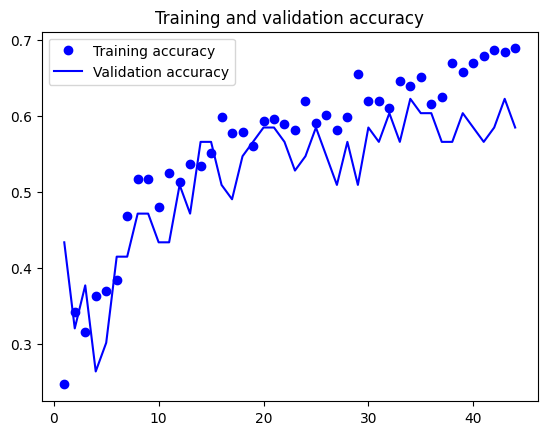

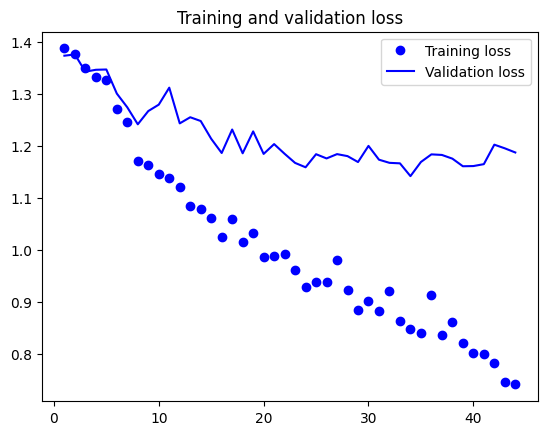

In [97]:
import matplotlib.pyplot as plt
accuracy = history_elu.history["accuracy"]
val_accuracy = history_elu.history["val_accuracy"]
loss = history_elu.history["loss"]
val_loss = history_elu.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 346ms/step
              precision    recall  f1-score   support

           0       0.33      0.36      0.35        11
           1       0.53      0.73      0.62        11
           2       0.69      0.50      0.58        18
           3       0.46      0.46      0.46        13

    accuracy                           0.51        53
   macro avg       0.51      0.51      0.50        53
weighted avg       0.53      0.51      0.51        53



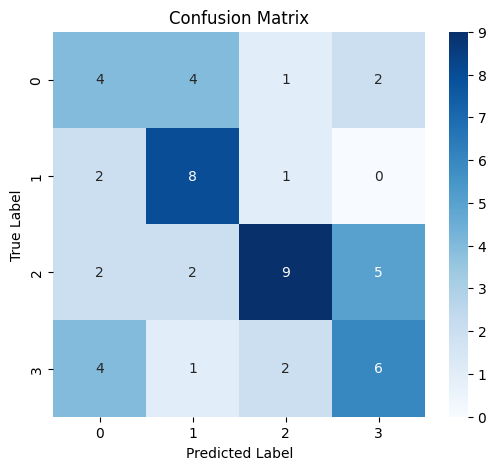

In [98]:
from sklearn.metrics import classification_report
import numpy as np

# Get predictions
y_pred = model_elu.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert to class labels
y_true_classes = np.argmax(y_test_onehot, axis=1)  # Convert test labels to class indices

# Print detailed classification report
print(classification_report(y_true_classes, y_pred_classes))
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(4), yticklabels=range(4))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## Task 3.4: Data Augmentation (Iteration 2)

### A: Preprocessing

https://edubuas-my.sharepoint.com/:f:/g/personal/235585_buas_nl/EljppVg_RMpFu8UsDDLPDf0BV1OYpFrIw_KZ7rfIu7Pb4g?e=fF8Yud - uploaded augmented data set to sharepoint to inspect images

I started off by simply loading the data and adjusting data augmentation on one instance. I wanted to create realistic images (data that looked like a normal human nail), but also make new images as different as possible compared to the original. This would make the augmented data set more impactful in both training and the business objective (training on real instances). My models must be trained on realistic data, building the ability to detect very subtle features in human nails. This will make detection and differentiation in nail classes stronger and more applicable to the real use case. A user who would use this app might have a wide range of unique symptoms. It is vital my algorithm is able to detect and correctly classify all instances accuractly. 

A lot of augmentations had created stretches in the image and too high of values (for several different augmentations such as zoom, shearing, channel shift, etc.) would create unrealistic images. Also, due to inconsistent lighting in my dataset applying data augmentation here (channel shift, gamma, contrast, and brightness) was very sensitive. These augmentations caused some of the instances to turn to a completely dark or white screen. I found channel_shift = 0.2 created the best use case for lighting situations. 

All in all, the best solution in creating realistic images was using fill_mode='reflect'. This augmentation filled the empty space of the image created by augmentation with a reflection of the image (instead of filling empty space with blank or distorted images). I found this was most realistic streching the possibility in applying small augmentations to create new realistic instances.

I applied data augmentation to the training set, in which I applied a specific amount of augmentations per class (I wanted to make sure the model was learning on real data patterns, not augmentation patterns). After applying data augmentation, I had some concerns about the large training size (3000 instances) compared to the smaller validation and test sets (53 instances). This is due to the fact I split the data before augmentation to only apply augmentation to only the training set. In the end, this solution is much more effective than applying data augmentation to all splits, as this would cause major data leakage. The small test and validation sets should not be an issue, but may cause variance in evaluation metrics.

After applying augmentations, I applied the same preprocessing I have throughout the template, normalizing the data and creating one hot labels.

In [280]:
# Add your code to preprocess your dataset for the CNN model using Data Augmentation.
import os
import numpy as np
import skimage as ski

# Folder paths where the images of each class are stored
folder_paths = [
    "Nails_Data_No_Blurrr/biotin_deficiency",
    "Nails_Data_No_Blurrr/healthy_nails",
    "Nails_Data_No_Blurrr/iron_deficiency",
    "Nails_Data_No_Blurrr//zinc_deficiency"]

# Class labels for the images (same order as folder_paths)
class_names = [
    "biotin", 
    "healthy",
    "iron",
    "zinc"
]

# Target size to resize the images
target_size = (256, 256)

# Arrays to store the images (X) and class labels (y)
X_aug = []
y_aug = []

for i in range(len(folder_paths)):
    for filename in os.listdir(folder_paths[i]):
        file_extension = os.path.splitext(filename)[1]
        # Check if the file extension is an image extension 
        if file_extension == ".jpg" or file_extension == ".jpeg" or file_extension == ".png": 
            image_filename = os.path.join(folder_paths[i], filename)
            # Read the image file using scikit-image
            image = ski.io.imread(image_filename)
            # Resize the image to the target_size
            image_resized = ski.transform.resize(image, target_size)
            # Insert the image into array X
            X_aug.append(image_resized)
            # Insert the class label into array y
            y_aug.append(class_names[i])
            
# Convert of arrays into numpy arrays
X_aug = np.array(X_aug)
y_aug = np.array(y_aug)

In [281]:
unique_classes_encoded, counts = np.unique(y_aug, return_counts=True)
class_counts = dict(zip(unique_classes_encoded, counts))

print("Number of images per encoded class:")
for encoded_label, count in class_counts.items():
    print(f"Encoded Class {encoded_label}: {count}")

Number of images per encoded class:
Encoded Class biotin: 105
Encoded Class healthy: 114
Encoded Class iron: 178
Encoded Class zinc: 130


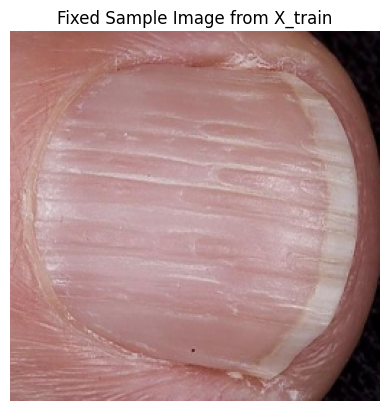

In [282]:
import numpy as np
import matplotlib.pyplot as plt

# Pick a sample from X_train
sample_image = X_aug[1]  # Select an image
plt.imshow(sample_image)
plt.axis("off")  # Hide axes for better visualization
plt.title("Fixed Sample Image from X_train")
plt.show()

First tested on augmentation on one image before applying to the entire dataset.

In [283]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Define your ImageDataGenerator with augmentations
data_gen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.05,
    zoom_range=[0.9, 1.1],
    vertical_flip=True,
    horizontal_flip=True,
    fill_mode='reflect',
    channel_shift_range=0.2
)

In [284]:
import numpy as np

def GenerateImages(generator, image, num_images):
    new_images = []
    # we need to reshape the image because the generator.flow() 
    # expects an array of images
    image = np.reshape(image, (1,) + image.shape)
    for _ in range(num_images):
        batch = next(generator.flow(image, batch_size=1))
        new_images.append(batch[0])
    return np.array(new_images)

In [285]:
import skimage as ski

# loads the image and converts it to a floating-point image, 
# where pixel values are represented in the range [0, 1].
image = ski.util.img_as_float(sample_image)

augmented_images = GenerateImages(data_gen, image, 9)

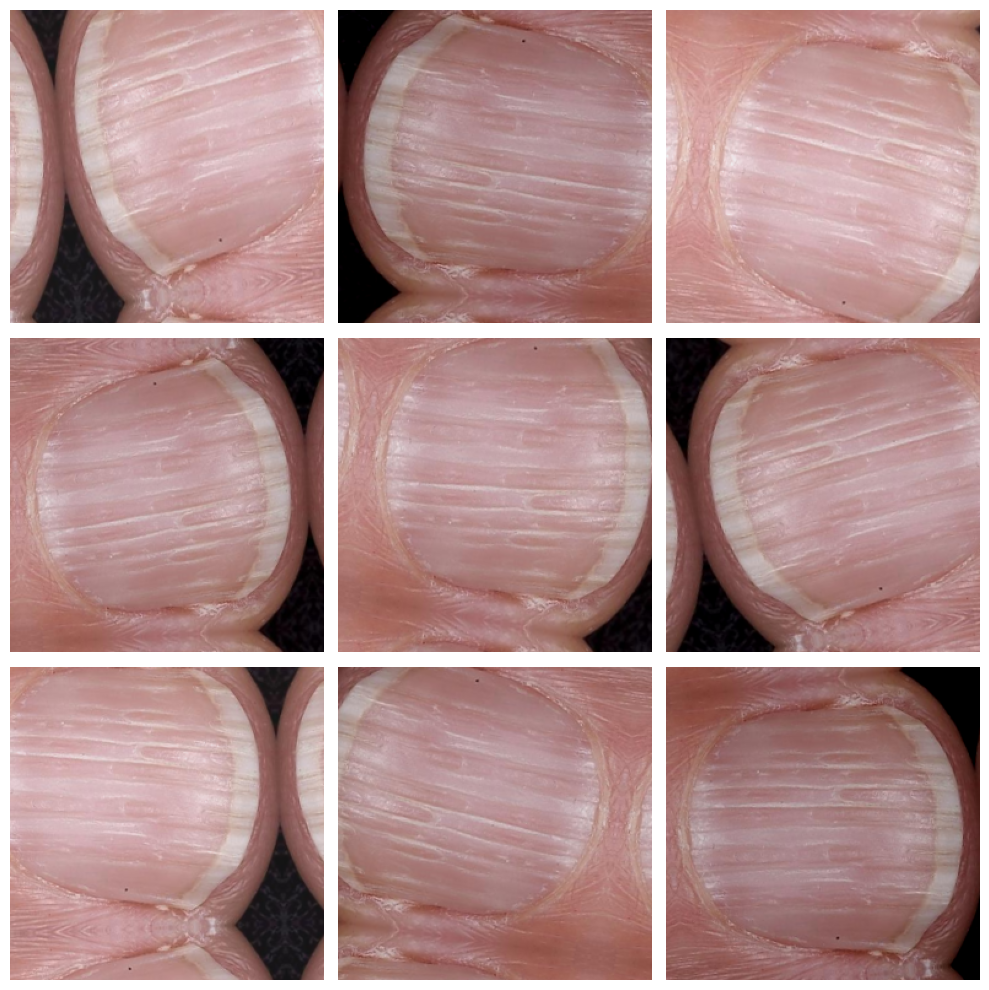

In [286]:
import matplotlib.pyplot as plt
import math

num_images = len(augmented_images)
grid_size = int(math.ceil(math.sqrt(num_images)))

fig, axes = plt.subplots(nrows=grid_size, ncols=grid_size, figsize=(10, 10))
axes = axes.flatten()

for i in range(grid_size * grid_size):
    if i < num_images:
        axes[i].imshow(augmented_images[i])
        axes[i].axis('off')
    else:
        axes[i].axis('off')   
        
plt.tight_layout()
plt.show()

After finalizing data augmentation, I split data and applied augmentation to only the training set

In [287]:
from sklearn.model_selection import train_test_split
X_aug_train, X_aug_test, y_aug_train, y_aug_test = train_test_split(X_aug,
                                                    y_aug,
                                                    test_size = 1/10,
                                                    random_state = 0,
                                                    stratify = y_aug)
                                                    
print(X_aug_train.shape, X_aug_test.shape)
print(y_aug_train.shape, y_aug_test.shape)

(474, 256, 256, 3) (53, 256, 256, 3)
(474,) (53,)


In [288]:
X_aug_train, X_aug_val, y_aug_train, y_aug_val = train_test_split(X_aug_train,
                                                  y_aug_train,
                                                  test_size = 1/9,
                                                  random_state = 0,
                                                  stratify = y_aug_train)
                                                  
print(X_aug_train.shape, X_aug_val.shape, X_aug_test.shape)
print(y_aug_train.shape, y_aug_val.shape, y_aug_test.shape)

(421, 256, 256, 3) (53, 256, 256, 3) (53, 256, 256, 3)
(421,) (53,) (53,)


In [289]:
# Set your target number of images per class
TARGET_SIZE = 750

# Identify unique classes in your training data
unique_classes = np.unique(y_aug_train)

# Lists to hold augmented images and their corresponding labels
X_augmented_list = []
y_augmented_list = []

# Iterate over each class to perform augmentation
for c in unique_classes:
    # Get indices and extract images for class 'c'
    indices = np.where(y_aug_train == c)[0]
    X_class = X_aug_train[indices]
    current_count = X_class.shape[0]
    print(f"Class {c} has {current_count} images.")
    
    # Calculate how many new images are needed for this class
    if current_count < TARGET_SIZE:
        needed = TARGET_SIZE - current_count
        
        # Generate 'needed' augmented images for class 'c'
        for _ in range(needed):
            # Randomly select one image from the current class
            idx = np.random.randint(0, current_count)
            original_image = X_class[idx]
            
            # Generate one augmented image using the helper function
            aug_img = GenerateImages(data_gen, original_image, 1)[0]
            
            # Append the new image and its label to the lists
            X_augmented_list.append(aug_img)
            y_augmented_list.append(c)
    else:
        print(f"Class {c} already meets or exceeds the target size.")

# Convert lists of augmented images and labels into numpy arrays
if len(X_augmented_list) > 0:
    X_augmented_new = np.array(X_augmented_list)
    y_augmented_new = np.array(y_augmented_list)
else:
    X_augmented_new = np.empty((0,) + X_aug_train.shape[1:])
    y_augmented_new = np.empty((0,))

# Combine the augmented data with the original training data
X_aug_train_new = np.concatenate([X_aug_train, X_augmented_new], axis=0)
y_aug_train_new = np.concatenate([y_aug_train, y_augmented_new], axis=0)

print("New training set shapes:", X_aug_train_new.shape, y_aug_train_new.shape)

Class biotin has 84 images.
Class healthy has 91 images.
Class iron has 142 images.
Class zinc has 104 images.
New training set shapes: (3000, 256, 256, 3) (3000,)


I checked to see all classes were same size and that code worked correctly

In [290]:
unique_classes_encoded, counts = np.unique(y_aug_train_new, return_counts=True)
class_counts = dict(zip(unique_classes_encoded, counts))

print("Number of images per encoded class:")
for encoded_label, count in class_counts.items():
    print(f"Encoded Class {encoded_label}: {count}")

Number of images per encoded class:
Encoded Class biotin: 750
Encoded Class healthy: 750
Encoded Class iron: 750
Encoded Class zinc: 750


In [291]:
X_aug_train_new = X_aug_train_new.astype('float32') / 255.0
X_aug_val = X_aug_val.astype('float32') / 255.0
X_aug_test = X_aug_test.astype('float32') / 255.0

testing random augmented image

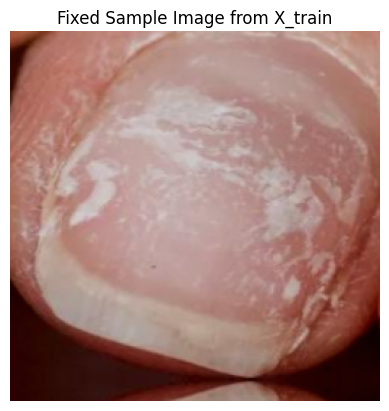

In [292]:
import numpy as np
import matplotlib.pyplot as plt

# Pick a sample from X_train
sample_aug = X_aug_train_new[700] * 255# Select an image
plt.imshow(sample_aug)
plt.axis("off")  # Hide axes for better visualization
plt.title("Fixed Sample Image from X_train")
plt.show()

In [293]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Step 1: Fit the encoder on training labels only
encoder = LabelEncoder()
encoder.fit(y_aug_train_new)

# Convert training labels
y_aug_train_encoded = encoder.transform(y_aug_train_new)
y_aug_train_onehot = to_categorical(y_aug_train_encoded)

# Convert test labels
y_aug_test_encoded = encoder.transform(y_aug_test)
y_aug_test_onehot = to_categorical(y_aug_test_encoded)

# Convert validation labels
y_aug_val_encoded = encoder.transform(y_aug_val)
y_aug_val_onehot = to_categorical(y_aug_val_encoded)

print("Training labels one-hot shape:", y_aug_train_onehot.shape)
print("Test labels one-hot shape:", y_aug_test_onehot.shape)
print("Validation labels one-hot shape:", y_aug_val_onehot.shape)

Training labels one-hot shape: (3000, 4)
Test labels one-hot shape: (53, 4)
Validation labels one-hot shape: (53, 4)


In [294]:
print(y_aug_train_onehot[:10])  # Ensure correct one-hot encoding or integer labels

[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]


I had to create my own class weights to reduce class imbalance due to the classes now being the same size

In [295]:
class_weight_dict = {0: 1.2, 1: 0.8, 2: 1.3, 3: 1.4}

### B: CNN Architecture

[Explain your strategy to establish the architecture of the CNN model here]

I used the same model architecture I used before. This was a basic CNN with elu activation, max pooling, and dense layers after the flatten. This consistency ensured that any improvements in the classification results could be attributed to the enhanced training data rather than architectural changes.

In [296]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(256, 256, 3))
x = layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="elu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="elu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, padding="same", activation="elu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)

# Dense layers with ELU activations
x = layers.Dense(256, activation="elu")(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(128, activation="elu")(x)
x = layers.Dropout(0.4)(x)

outputs = layers.Dense(4, activation="softmax")(x)
model_aug_elu = keras.Model(inputs=inputs, outputs=outputs)

model_aug_elu.compile(loss="categorical_crossentropy",
                  optimizer=keras.optimizers.Adam(learning_rate=0.0001),
                  metrics=["accuracy"])

In [297]:
model_aug_elu.summary()

Model: "functional_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_33 (InputLayer)     │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 256)            │    33,554,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,681,348 (128.48 MB)

 Trainable params: 33,681,348 (128.48 MB)

 Non-trainable params: 0 (0.00 B)

### C: CNN Training

I used the callbacks early_stopping and model checkpoint. I found early stopping with a patience of 12 yielded the best results. I had to be specfic with the patience so that the model would stop training before overfitting the train set, but also train enough to reach optimal accuracy levels. I used model checkpoint as a way of saving the model so I could understand and reflect on different model iterations. I found batch_size=32 was the best value to increase training speed with more weight updates, and its combination with early stopping caused the model to train until it reached optimal levels. I found class_weight_dict = {0: 1.2, 1: 0.8, 2: 1.3, 3: 1.4} yielded the best class results. I adjusted these levels a lot based on the classification results, and found setting these initial weights led to the model focusing more on the classes that were underpreforming, while also maintaining the high accuracy levels in classes that preformed well. 

In [298]:

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss"),
        early_stopping
    
]

In [299]:
history_aug_elu = model_aug_elu.fit(
        X_aug_train_new, y_aug_train_onehot,
        epochs=100,
        batch_size=32,
        class_weight=class_weight_dict,
        validation_data=(X_aug_val, y_aug_val_onehot),
        callbacks=callbacks)


Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.2627 - loss: 1.5926 - val_accuracy: 0.2264 - val_loss: 1.3783
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.3340 - loss: 1.5437 - val_accuracy: 0.4717 - val_loss: 1.2653
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.3733 - loss: 1.4987 - val_accuracy: 0.5094 - val_loss: 1.2035
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.4197 - loss: 1.4618 - val_accuracy: 0.6038 - val_loss: 1.1817
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.4276 - loss: 1.4469 - val_accuracy: 0.5660 - val_loss: 1.1647
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.4585 - loss: 1.4099 - val_accuracy: 0.5660 - val_loss: 1.1194
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.4717 - loss: 1.3963 - val_accuracy: 0.6226 - val_loss: 1.1021
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.4583 - loss: 1.3817 - val_accuracy: 0

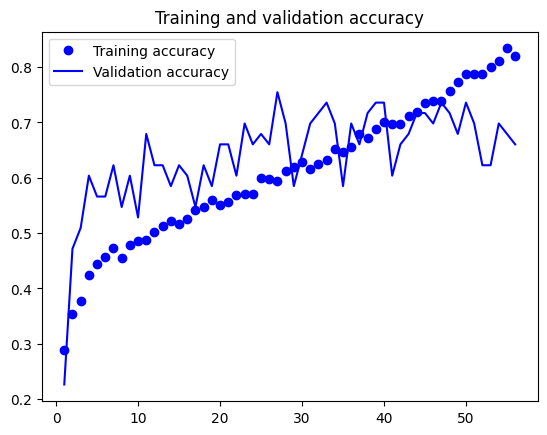

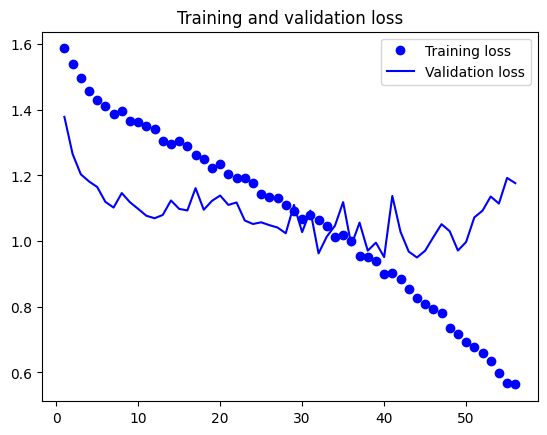

In [300]:
import matplotlib.pyplot as plt
accuracy = history_aug_elu.history["accuracy"]
val_accuracy = history_aug_elu.history["val_accuracy"]
loss = history_aug_elu.history["loss"]
val_loss = history_aug_elu.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

### D: Model Evaluation

60% accuracy for 300 images with loss being much higher in training.

54% accuracy for 500 images with accuracy and loss visuals being very strong. More dispersed classifcation report.

50% accuracy for 750 images accuracy and loss visuals are strong but classification report has major error in classes 2 and 3.

Strategy:

I found 750 was the strongest target value for each class size in applying data augmentation. This was seen as the loss and accuracy of both the test and train set were closely aligned in training. This suggested the model could learn without drastically overfitting, yet still capture enough variation in the data. I was able to overfit the data effectively and the model was learning important patterns (then beggining to focus on building a more complex model to battle overfitting). Additionally, in the classification metrics, I found that these values remained consistent with my previous models. I manually added class weights as now the classes were the same size after data augmentation however no large impacts were made. This was because classes 0, 2, and 3 (deficiency classes) were still underperforming in the classification metrics compared to healthy nails (class 1) with an accuracy of over 80%, while these classes remained in the 40-60% range.

Overall, the accuracy improvement was moderate (10%) and the model began to show further consistency across classes. The classification metrics and confusion matrix remained relatively stable (after manually adjusting weights), suggesting that most of the heavy lifting was done by the data augmentation itself.

Results:

There are obviously still data set issues that data augmentation cannot hide or very subtle feature detection that requires more training in a heavier model. While data augmentation can increase the data set size, and introduce more varied examples, it also replicates underlying issues present in the original data and model architecture. Specifically, the original images contain noise or inconsistent features, those flaws are merely reproduced in new samples. After reviewing several aspects of this data set, uploading it the sharepoint, I can see there are some inconsistent images. This can be seen as very low quality images, or a wide variety of visable symptoms in the deficiency class. For example, in the biotin class, biotin deficiency can appear as lines or ridges on the nail, and simultaneously thick black curved nails. While all instances are important for the model to be able to classify, these can cause make classifying for the model much more difficult.

I thought about dividing each deficiency into a subclasses such as low biotin deficiency and extreme biotin deficiency. I decided not implement this because the model would dissassociate classes that were similar. The model would see the same difference between (healthy and extreme biotin deficiency) and (low biotin deficiency and extreme biotin deficiency). Additionally, these classes would be much harder to label as the definitions, and assortment of each instance would be up to me (the inspector), and not scientifically defined (important aspect of application).

On the other hand, while stronger and more uniform patterns can be learned with more data, to reach better results through modeling it would be most beneficial to preform stronger data cleaning (remove or correct low-quality images before augmentation) and collection (gather more representative samples that better capture the real-world variability of nail images) when using smaller models. 

These results did show the positive impact of data augmentation in machine learning (reflected in improved training and validation metrics compared to earlier iterations.) However, despite the augmentation, certain classes (particularly Classes 2 and 3) continue to underperform, as indicated by imbalances in the confusion matrix and classification metrics. I continually attempted to adjust the model, however, there is only so much improvement that can be made with low quality input (or small model).

Overall, with 750 images per class, this iteration showed better alignment between training and validation loss, and overall performance improved by approximately 10%. This indicates that the augmented data helped the model generalize more consistently across classes. I am very interested to see how transfer learning will impact the detection of specific features in my dataset through denser model's training on augmented data.

**Retake**: Compared to both the MLP and CNN model, the validation curve stays much closer to the training curve through the first 30–35 epochs, indicating that augmentation is successfully regularizing the model. The training/validation gap remains narrow for much of training. Early plateaus in validation loss and accuracy carry over from the CNN scratch model but are dampened here, confirming that randomly transformed images help the network learn more robust features. Unfortunately there is still overfitting, I chose high early stopping values because I saw additional model improvements that were cut off due to early stopping. While increasing this value saw stronger overfitting, the results seen in the evaluation metrics showed it was worth it. 

When it comes to the confusion matrix and classification report, Weighted F₁ of 0.62 marks a solid jump from the scratch-CNN’s ~51%, confirming that on-the-fly augmentation meaningfully improved generalization.

There was improved performance across classes with few cross-extreme mistakes now showing the model is learning the “spectrum” but still blurs the boundaries at the ends.

Overall, with 750 images per class, this iteration showed better alignment between training and validation loss, and overall performance improved by approximately 10%. This indicates that the augmented data helped the model generalize more consistently across classes. I am very interested to see how transfer learning will impact the detection of specific features in my dataset through denser model's training on augmented data. (copied)

In [301]:
model_aug_elu.evaluate(X_aug_test, y_aug_test_onehot)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6338 - loss: 0.9637 


[1.026167869567871, 0.6226415038108826]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 290ms/step
              precision    recall  f1-score   support

           0       0.56      0.45      0.50        11
           1       0.82      0.82      0.82        11
           2       0.61      0.61      0.61        18
           3       0.53      0.62      0.57        13

    accuracy                           0.62        53
   macro avg       0.63      0.62      0.63        53
weighted avg       0.62      0.62      0.62        53



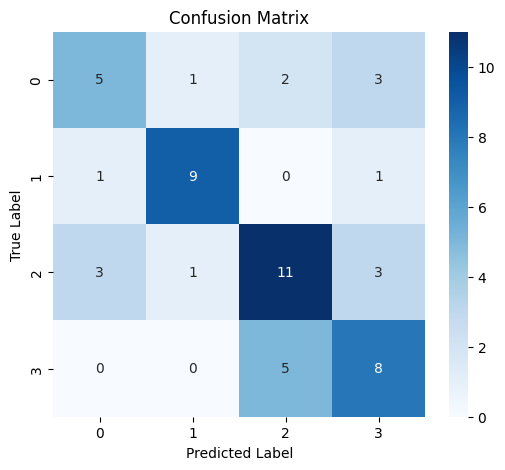

In [302]:
from sklearn.metrics import classification_report
import numpy as np

# Get predictions
y_pred = model_aug_elu.predict(X_aug_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert to class labels
y_true_classes = np.argmax(y_aug_test_onehot, axis=1)  # Convert test labels to class indices

# Print detailed classification report
print(classification_report(y_true_classes, y_pred_classes))
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(4), yticklabels=range(4))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## Task 3.5: Transfer Learning (Iteration 3)

### A: Preprocessing

MobileNetV2 was designed to work with specific input sizes (typically square images with dimensions 96, 128, 160, 192, or 224) and that the pre-trained weights were optimized for those sizes. Since my data was an input shape of (256, 256, 3) while MobileNetV2 and DenseNet121 default to using weights for an input shape of (224, 224, 3), I loaded my data using the target_size = (224, 224).

I also did not divide by 255 because MobileNetV2 and DenseNet121 expect [0, 1] range. My X values (images) are already in float format so I did not include this format and division step (astype('float32') / 255.0) I performed one hot encoding and applied class weights (improving minority classification) again because I am just implementing transfer learning on the base data, not the augmented data set. This was done with the purpose of isolating the effect of transfer learning on my project's performance.

In [252]:
import os
import numpy as np
import skimage as ski

# Folder paths where the images of each class are stored
folder_paths = [
    "Nails_Data_No_Blurrr/biotin_deficiency",
    "Nails_Data_No_Blurrr/healthy_nails",
    "Nails_Data_No_Blurrr/iron_deficiency",
    "Nails_Data_No_Blurrr//zinc_deficiency"]

# Class labels for the images (same order as folder_paths)
class_names = [
    "biotin", 
    "healthy",
    "iron",
    "zinc"
]

# Target size to resize the images
target_size = (224, 224)

# Arrays to store the images (X) and class labels (y)
X = []
y = []

for i in range(len(folder_paths)):
    for filename in os.listdir(folder_paths[i]):
        file_extension = os.path.splitext(filename)[1]
        # Check if the file extension is an image extension 
        if file_extension == ".jpg" or file_extension == ".jpeg" or file_extension == ".png": 
            image_filename = os.path.join(folder_paths[i], filename)
            # Read the image file using scikit-image
            image = ski.io.imread(image_filename)
            # Resize the image to the target_size
            image_resized = ski.transform.resize(image, target_size)
            # Insert the image into array X
            X.append(image_resized)
            # Insert the class label into array y
            y.append(class_names[i])
            
# Convert of arrays into numpy arrays
X = np.array(X)
y = np.array(y)

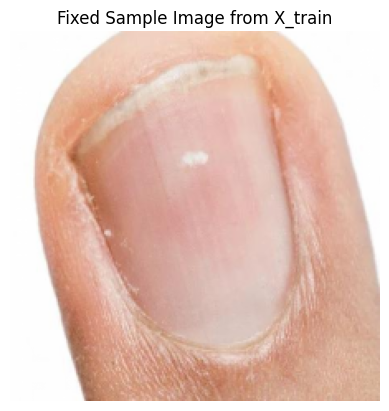

In [253]:
import numpy as np
import matplotlib.pyplot as plt

# Pick a sample from X_train
sample_image = X[480]  # Select an image
plt.imshow(sample_image)
plt.axis("off")  # Hide axes for better visualization
plt.title("Fixed Sample Image from X_train")
plt.show()

In [254]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 1/10,
                                                    random_state = 0,
                                                    stratify=y)
                                                    
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(474, 224, 224, 3) (53, 224, 224, 3) (474,) (53,)


In [255]:
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  test_size = 1/9,
                                                  random_state = 0,
                                                  stratify=y_train)
                                                  
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_test.shape, y_val.shape)

(421, 224, 224, 3) (53, 224, 224, 3) (53, 224, 224, 3) (421,) (53,) (53,)


In [256]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Step 1: Fit the encoder on training labels only
encoder = LabelEncoder()
encoder.fit(y_train)

# Convert training labels
y_train_encoded = encoder.transform(y_train)
y_train_onehot = to_categorical(y_train_encoded)

# Convert test labels
y_test_encoded = encoder.transform(y_test)
y_test_onehot = to_categorical(y_test_encoded)

# Convert validation labels
y_val_encoded = encoder.transform(y_val)
y_val_onehot = to_categorical(y_val_encoded)

print("Training labels one-hot shape:", y_train_onehot.shape)
print("Test labels one-hot shape:", y_test_onehot.shape)
print("Validation labels one-hot shape:", y_val_onehot.shape)

Training labels one-hot shape: (421, 4)
Test labels one-hot shape: (53, 4)
Validation labels one-hot shape: (53, 4)


In [257]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute class weights using the integer-encoded training labels
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train_encoded),
    y=y_train_encoded
)
class_weight_dict = dict(zip(np.unique(y_train_encoded), class_weights))
print("Class weights:", class_weight_dict)

Class weights: {0: 1.2529761904761905, 1: 1.1565934065934067, 2: 0.7411971830985915, 3: 1.0120192307692308}


### B: CNN Architecture

I used image net because of its basic and useable architecture. ImageNet's pre-trained weights offer a rich variety of learned features.

I also decided to use DenseNet121 because it is popular in medical imaging. Additionally, its dense connections encourage feature reuse and provide better gradient flow. This can be particularly useful when subtle texture or color differences (common in nail images) need to be captured. This model should be able to apply better to my use case than other architectures.

I began by implementing my model base with elu and dropout that was successful in previous iterations as a custom head because it was successful in translating the features extracted into predictions for nail classification.

After experimenting with these basic transfer learning models, I found that both MobileNetV2 and DenseNet121 were successful. Both models' ability to extract hierarchical features from images proved to be successful in learning patterns in thed dataset, however, they classified incorrectlyI found that feature selection was not effective enough for the specific challenges of classifying realistic nail deficiencies.

I began to experiment with fine tuning. I started by unfreezing and training the first 20 layers of the model for fine tuning, but found unfreezing only the last 15 layers balanced the need to adapt high-level features to my nuanced classes, also, preventing overfitting that occured if too many layers were unfrozen on my small dataset. Additionally, a lower learning rate (1e-5) was used during fine tuning. This gradual adjustment allowed the unfrozen layers to learn domain specific patterns more effectively without disrupting the valuable pre trained weights, thus reducing overfitting.

In the end, after experimenting heavily with MobileNetV2, I found that creating a very similar architecture and applying it to the DenseNet121 model was most successful. I believe this was mostly due to the dense connections that allow gradients to pass more directly through the network. This led to more stable training, which was not seen in the MobileNetV2 training. In MobileNetV2 training it was common for the model's accuracy on the training set to quickly overfit to 99% while the validation set would remain around 60% leading to a final accuracy on the evaluation or test set to be around 70%. Playing around with higher dropout rates, L2 regularization, and lower learning rate in the top layers were all unsuccessful in correcting this issue. After implementation of the similar DenseNet121 model, I realized that this architecture was much stronger in solving my particularly use case with much better classifaction among all classes while MobileNetV2 still struggled with class 3 'zinc'.

In [260]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# 1. Load the DenseNet121 base model with pretrained ImageNet weights
#    Exclude the top classification layers with include_top=False.
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model initially

# 2. Create a new input layer and attach the custom classification head.
inputs = Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)  # Use base_model for feature extraction
x = GlobalAveragePooling2D()(x)          # Reduce each feature map to a single value
x = Dense(256, activation="elu")(x)      # Dense layer with ELU activation
x = Dropout(0.4)(x)                      # Dropout for regularization
x = Dense(128, activation="elu")(x)      # Another dense layer with ELU activation
x = Dropout(0.4)(x)                      # Dropout for further regularization
outputs = Dense(4, activation="softmax")(x)  # Final softmax layer for 4-class classification

# 3. Build the model
model_densenet = Model(inputs=inputs, outputs=outputs)

# 4. Compile the model for initial training (only the new head is trainable)
model_densenet.compile(loss="categorical_crossentropy",
                       optimizer=Adam(learning_rate=1e-4),
                       metrics=["accuracy"])

# ... Perform initial training on your dataset ...

# 5. Fine-tuning: Unfreeze the last 15 layers of the base model for adaptation
for layer in base_model.layers[-15:]:
    layer.trainable = True
for layer in base_model.layers[:-15]:
    layer.trainable = False

# 6. Recompile the model with a lower learning rate for fine-tuning
model_densenet.compile(loss="categorical_crossentropy",
                       optimizer=Adam(learning_rate=1e-5),
                       metrics=["accuracy"])



In [261]:
model_densenet.summary()

Model: "functional_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_32 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ densenet121 (Functional)        │ (None, 7, 7, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,333,316 (27.97 MB)

 Trainable params: 623,940 (2.38 MB)

 Non-trainable params: 6,709,376 (25.59 MB)

### C: CNN Training

In training, I found that my data was already prepared to be used for both models. I did not need to use the specific preprocessing steps for these models. 

I found that a high patience in early stopping let the models reach the absolute maximum of the gradient because they would often get stuck at local minima. This was because I adjusted the learning rate for fine tuning. The small gradient descent updates were initially very small causing early stopping to cut the model's off in training too early (when they could learn to correctly classify up to an additional 50% improvement in accuracy). While in training of the MobileNetV2, the model overfit the training set very quickly while the validation set accuracy remained the same later in training. MobileNetV2, being a lighter architecture, can sometimes memorize training data. Several different strategies such as increasing dropout, implementing L2 regularization, and lowering the learning rate in the beginning layers were all unsuccessful in completely controlling overfitting. 

On the other hand, while training the DenseNet121 model, I had to set an even higher patience. The validation set accuracy would reach higher percentages much quicker and would flat line at around 70%. A much higher patience let the model's training on the test set improve gradually, eventually surpassing and raising the validation set accuracy as well. DenseNet121’s dense connections allow for better feature reuse and more robust gradient flow. These characteristics enable the model to slowly improve even after hitting an early plateau. With a high patience setting, I allowed these subtle improvements to accumulate, leading to a better balance between training and validation performance. I will continue to adjust the parameters in the DenseNet121 model in later iterations as well as apply data augmentation to further increase the effectivness of the model. 
 
**I muted the code for the model_dense because the preprocessing required created incorrectly scaled data for other models. These results were insignificant (I just wanted to show this working feature extraction model).**

In [267]:
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

In [268]:
history_densenet = model_densenet.fit(X_train, y_train_onehot, epochs=500, batch_size=32, 
              validation_data=(X_val, y_val_onehot),
              class_weight=class_weight_dict,
              callbacks=early_stopping)

Epoch 1/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 670ms/step - accuracy: 0.2281 - loss: 2.1984

2025-04-10 14:00:28.618743: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_1', 8 bytes spill stores, 8 bytes spill loads



14/14 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.2276 - loss: 2.1970 - val_accuracy: 0.2453 - val_loss: 1.6530
Epoch 2/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.2775 - loss: 2.1724 - val_accuracy: 0.2642 - val_loss: 1.5931
Epoch 3/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.2860 - loss: 1.9301 - val_accuracy: 0.2830 - val_loss: 1.5507
Epoch 4/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.2421 - loss: 2.0594 - val_accuracy: 0.2830 - val_loss: 1.5193
Epoch 5/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.2796 - loss: 1.8527 - val_accuracy: 0.3019 - val_loss: 1.4878
Epoch 6/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.2864 - loss: 2.0376 - val_accuracy: 0.3396 - val_loss: 1.4699
Epoch 7/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.2958 - loss: 1.8159 - val_accuracy: 0.3585 - val_loss: 1.4501
Epoch 8/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.2816 - loss: 1.8604 - val_accuracy: 0.3585 - val_lo

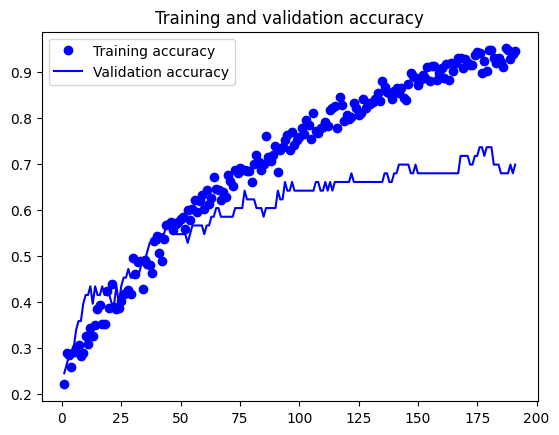

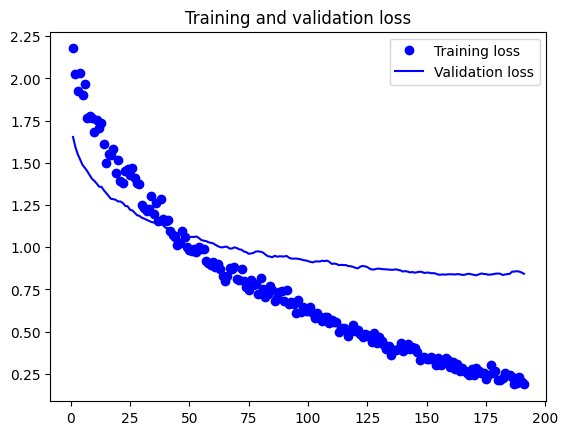

In [269]:
import matplotlib.pyplot as plt
accuracy = history_densenet.history["accuracy"]
val_accuracy = history_densenet.history["val_accuracy"]
loss = history_densenet.history["loss"]
val_loss = history_densenet.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

### D: Model Evaluation

When evaluating these model's it was very important to monitor both the final evaluations on the test sets, aswell as the classification report. In many iterations of these models there would be inconsistencies between training, test accuracy, loss graphs, and final evaluation on the test set. By comparing final test set metrics to training and validation graphs, I could identify any indications that the model might be overfitting or underperforming despite seemingly good performance during training. When I saw a large mismatch between training/validation metrics in the final test set, it showed that the model might be memorizing the training data. This caused me to change architecture, hyperparameters, and increase regularization techniques. 

When I had reached later stages of model improvement, it was very useful to look at the classification report. Adjustments made to hyperparameters (learning rate, dropout rate, and the number of unfrozen layers) directly influence the model's learning process and its ability to generalize. It is very important for me to prioritize class performance (classification metrics): opposed to overall accuracy. This is due to the fact misclassifications can lead to false alarms or missed diagnoses. 

In class 1 'healthy nails', it was very important that the model could not only distinguish between nuanced nail deficiencies, but also when a nail lacked any of the specific features that caused classification as a nail deficiency. My model's have largely had difficulties in classifying the nutrient deficient classes, especially class 3 'zinc', and the implementation of the DenseNet121 model was the first iteration where class performance was more evenly distributed. This was specifically clear in the classification metrics between the MobileNetV2 and DenseNet121 models. While accuracy metrics were very similar (within 5%), when inspecting these metrics, the more generalizable model was clear. The MobileNetV2 model had strong preference for the healthy nails class. This gives me hope moving into further model experimentation, such as implementation of data augmentation on the transfer learning model.

**Retake**:

Based on the accuracy and loss plots, in the first 10–20 epochs, validation accuracy (line) jumps from ~25% to ~40–45%, showing the pretrained backbone quickly adapts to our nail-image domain. This shows that the DenseNet121 model was successful in implementing feature reuse on my use-case, showing a more dense model is successfully in capturing these subtle features. On the other hand, the gap between training (95%) and validation (~65%) is larger than in the purely augmented CNN, indicating that without augmentation the model begins to overfit the fine-tuned layers (also due to early_stopping).

Next according to the classification report and confusion matrix, All four classes now achieve F₁-scores between 0.76 and 0.81, a dramatic tightening compared to earlier MLP and scratch-CNN runs. Notably, class 1 reaches perfect recall (1.00), ensuring no mild-deficiency cases are missed. 

Overall, the feature detection shown in the DenseNet121 model was very successful in adopting to nail-images. The stronger feature detection showed much improved classification results with much fewer misclassification occuring. There is still room for improvement as the dense model begins to overfit very hard to the training data. Using transfer learning on a larger (augmented) data set improve results even more.

In [275]:
model_densenet.evaluate(X_test, y_test_onehot)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8096 - loss: 0.6021


[0.6254616379737854, 0.7924528121948242]

2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 8s/step
              precision    recall  f1-score   support

           0       0.80      0.73      0.76        11
           1       0.69      1.00      0.81        11
           2       0.82      0.78      0.80        18
           3       0.90      0.69      0.78        13

    accuracy                           0.79        53
   macro avg       0.80      0.80      0.79        53
weighted avg       0.81      0.79      0.79        53



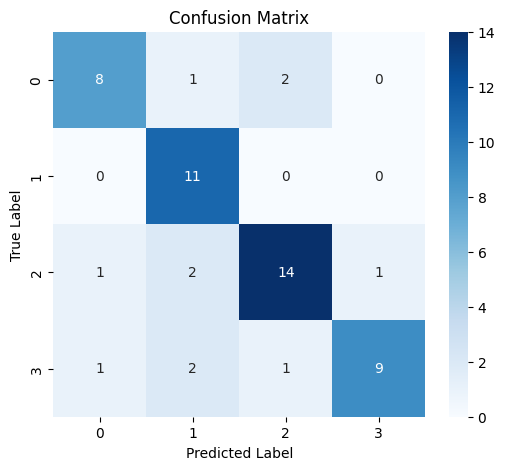

In [276]:
from sklearn.metrics import classification_report
import numpy as np

# Get predictions
y_pred = model_densenet.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert to class labels
y_true_classes = np.argmax(y_test_onehot, axis=1)  # Convert test labels to class indices

# Print detailed classification report
print(classification_report(y_true_classes, y_pred_classes))
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(4), yticklabels=range(4))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## Task 3.6: Model Improvement (Iteration 4)

### A: Preprocessing

I loaded the same augmented data steps as in iteration 2. Due to heavy testing in this previous iteration, the augmented dataset I created maintained business objectives of creating realistic images while also increasing model preformance. I loaded the data, split the data, applied data augmentation to the training set, and applied class weights

In [210]:
# Add your code to preprocess the dataset for the CNN model.
import os
import numpy as np
import skimage as ski

# Folder paths where the images of each class are stored
folder_paths = [
    "Nails_Data_No_Blurrr/biotin_deficiency",
    "Nails_Data_No_Blurrr/healthy_nails",
    "Nails_Data_No_Blurrr/iron_deficiency",
    "Nails_Data_No_Blurrr//zinc_deficiency"]

# Class labels for the images (same order as folder_paths)
class_names = [
    "biotin", 
    "healthy",
    "iron",
    "zinc"
]

# Target size to resize the images
target_size = (224, 224)

# Arrays to store the images (X) and class labels (y)
X_final = []
y_final = []

for i in range(len(folder_paths)):
    for filename in os.listdir(folder_paths[i]):
        file_extension = os.path.splitext(filename)[1]
        # Check if the file extension is an image extension 
        if file_extension == ".jpg" or file_extension == ".jpeg" or file_extension == ".png": 
            image_filename = os.path.join(folder_paths[i], filename)
            # Read the image file using scikit-image
            image = ski.io.imread(image_filename)
            # Resize the image to the target_size
            image_resized = ski.transform.resize(image, target_size)
            # Insert the image into array X
            X_final.append(image_resized)
            # Insert the class label into array y
            y_final.append(class_names[i])
            
# Convert of arrays into numpy arrays
X_final = np.array(X_final)
y_final = np.array(y_final)


In [211]:
unique_classes_encoded, counts = np.unique(y_final, return_counts=True)
class_counts = dict(zip(unique_classes_encoded, counts))

print("Number of images per encoded class:")
for encoded_label, count in class_counts.items():
    print(f"Encoded Class {encoded_label}: {count}")

Number of images per encoded class:
Encoded Class biotin: 105
Encoded Class healthy: 114
Encoded Class iron: 178
Encoded Class zinc: 130


In [212]:
from sklearn.model_selection import train_test_split
X_final_train, X_final_test, y_final_train, y_final_test = train_test_split(X_final,
                                                    y_final,
                                                    test_size = 1/10,
                                                    random_state = 0,
                                                    stratify = y_final)
                                                    
print(X_final_train.shape, X_final_test.shape)
print(y_final_train.shape, y_final_test.shape)

(474, 224, 224, 3) (53, 224, 224, 3)
(474,) (53,)


In [213]:
X_final_train, X_final_val, y_final_train, y_final_val = train_test_split(X_final_train,
                                                  y_final_train,
                                                  test_size = 1/9,
                                                  random_state = 0,
                                                  stratify = y_final_train)
                                                  
print(X_final_train.shape, X_final_val.shape, X_final_test.shape)
print(y_final_train.shape, y_final_val.shape, y_final_test.shape)

(421, 224, 224, 3) (53, 224, 224, 3) (53, 224, 224, 3)
(421,) (53,) (53,)


In [214]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Define your ImageDataGenerator with augmentations
data_gen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.05,
    zoom_range=[0.9, 1.1],
    vertical_flip=True,
    horizontal_flip=True,
    fill_mode='reflect',
    channel_shift_range=0.2
)

In [215]:
import numpy as np

def GenerateImages(generator, image, num_images):
    new_images = []
    # we need to reshape the image because the generator.flow() 
    # expects an array of images
    image = np.reshape(image, (1,) + image.shape)
    for _ in range(num_images):
        batch = next(generator.flow(image, batch_size=1))
        new_images.append(batch[0])
    return np.array(new_images)

In [216]:
# Set your target number of images per class
TARGET_SIZE = 750

# Identify unique classes in your training data
unique_classes = np.unique(y_final_train)

# Lists to hold augmented images and their corresponding labels
X_final_augmented_list = []
y_final_augmented_list = []

# Iterate over each class to perform augmentation
for c in unique_classes:
    # Get indices and extract images for class 'c'
    indices = np.where(y_final_train == c)[0]
    X_class = X_final_train[indices]
    current_count = X_class.shape[0]
    print(f"Class {c} has {current_count} images.")
    
    # Calculate how many new images are needed for this class
    if current_count < TARGET_SIZE:
        needed = TARGET_SIZE - current_count
        
        # Generate 'needed' augmented images for class 'c'
        for _ in range(needed):
            # Randomly select one image from the current class
            idx = np.random.randint(0, current_count)
            original_image = X_class[idx]
            
            # Generate one augmented image using the helper function
            final_img = GenerateImages(data_gen, original_image, 1)[0]
            
            # Append the new image and its label to the lists
            X_final_augmented_list.append(final_img)
            y_final_augmented_list.append(c)
    else:
        print(f"Class {c} already meets or exceeds the target size.")

# Convert lists of augmented images and labels into numpy arrays
if len(X_final_augmented_list) > 0:
    X_final_augmented_new = np.array(X_final_augmented_list)
    y_final_augmented_new = np.array(y_final_augmented_list)
else:
    X_final_augmented_new = np.empty((0,) + X_final_train.shape[1:])
    y_final_augmented_new = np.empty((0,))

# Combine the augmented data with the original training data
X_final_aug_train_new = np.concatenate([X_final_train, X_final_augmented_new], axis=0)
y_final_aug_train_new = np.concatenate([y_final_train, y_final_augmented_new], axis=0)

print("New training set shapes:", X_final_aug_train_new.shape, y_final_aug_train_new.shape)

Class biotin has 84 images.
Class healthy has 91 images.
Class iron has 142 images.
Class zinc has 104 images.
New training set shapes: (3000, 224, 224, 3) (3000,)


In [217]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Step 1: Fit the encoder on training labels only
encoder = LabelEncoder()
encoder.fit(y_final_aug_train_new)

# Convert training labels
y_final_aug_train_encoded = encoder.transform(y_final_aug_train_new)
y_final_aug_train_onehot = to_categorical(y_final_aug_train_encoded)

# Convert test labels
y_final_test_encoded = encoder.transform(y_final_test)
y_final_test_onehot = to_categorical(y_final_test_encoded)

# Convert validation labels
y_final_val_encoded = encoder.transform(y_final_val)
y_final_val_onehot = to_categorical(y_final_val_encoded)

print("Training labels one-hot shape:", y_final_aug_train_onehot.shape)
print("Test labels one-hot shape:", y_final_test_onehot.shape)
print("Validation labels one-hot shape:", y_final_val_onehot.shape)

Training labels one-hot shape: (3000, 4)
Test labels one-hot shape: (53, 4)
Validation labels one-hot shape: (53, 4)


In [218]:
class_weight_dict = {0: 1.1, 1: 1, 2: 1.1, 3: 1.75} #best values I found

### B: CNN Architecture

[Explain your strategy to establish the architecture of the CNN model for this iteration here]

I started with the same DenseNet121 application that was the best preforming model to first illustrate the impact of data augmentation on its own. I then continued to change the architecture to reduce overfitting and increase classification metrics. I did this by iteratively adjusting a learning rate scheduler, implementing AdamW, dropout, and fine tuning. 

I also experimented with GlobalAveragePooling (GAP), using a flatten layer then a MaxPooling2D layer, but found that GlobalMaxPooling (GMA) was the most successful. Instead of taking averages of all the values in each feature map, reducing each channel to a single number, GMP takes the maximum value from each feature map.  GMP emphasizes the most prominent activation within each feature map. This proved to be useful in my use case where the strongest signal is the most discriminative. This is seen in the similarities between nail features across classes. By making the model more sensitive to these features, it preformed better.

Initial observations with same model with data augmentation:

I applied a small class weight to classes 2 and 3. This was due to the fact in the first implementation of this model, combining the same model from transfer learning, and the same processes in data augmentaion I found there was a small increase in accuracy (4%), however much more balanced classification metrics and confusion matrix among classes.
Specifically, this was seen in a much more uniform metrics among classes. Specifically this was seen in a F1 score range improvment from 22 to 12. Also, class precision range dropped from 23 to only 9. Particularly, class 2 decreased in all metrics and while class 3 improved greatly in precision and F1 score, it still underpreformed in recall greatly. 

In [219]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import GlobalMaxPooling2D, GlobalAveragePooling2D, MaxPooling2D, Dense, Dropout, Input  # Use GlobalMaxPooling2D instead
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, AdamW

# 1. Transfer Learning
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  

# 2. Elu Dense Layers 
inputs = Input(shape=(224, 224, 3))
x = base_model(inputs, training=False) 
x = GlobalMaxPooling2D()(x)            
x = Dense(256, activation="elu")(x) 
x = Dropout(0.5)(x)                     
x = Dense(128, activation="elu")(x)     
x = Dropout(0.5)(x)                   
outputs = Dense(4, activation="softmax")(x)  

# 3. Build the model
model_final = Model(inputs=inputs, outputs=outputs)

# 4. Compile the model for initial training (only the new head is trainable)
model_final.compile(loss="categorical_crossentropy",
                    optimizer=Adam(learning_rate=1e-4),
                    metrics=["accuracy"])

# 5. Fine-tuning: 
for layer in base_model.layers[-20:]:
    layer.trainable = True
for layer in base_model.layers[:-20]:
    layer.trainable = False

# 6. Recompile the model with a lower learning rate for fine-tuning
model_final.compile(loss="categorical_crossentropy",
                    optimizer=Adam(learning_rate=1e-5),
                    metrics=["accuracy"])


In [220]:
model_final.summary()

Model: "functional_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_27 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ densenet121 (Functional)        │ (None, 7, 7, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d_2          │ (None, 1024)           │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,333,316 (27.97 MB)

 Trainable params: 662,980 (2.53 MB)

 Non-trainable params: 6,670,336 (25.45 MB)

### C: CNN Training

The model still overfit the training set producing much higher training accuracy as compared to validation set accuracy. Due to the fact, this same pattern was shown on the implementation of the same DenseNet121 model without data augmentaion. I decided implementing regularization techniques to combat overfitting would be the focus of this iteration.

In order to do this I will implement several different strategies, testing their impact one at a time.

To begin, I focused on class_weights. Due to some classes underpreforming, it was essential the model was fair and focused on classifying all instances into classes at similar rates. 

Learning rate scheduler: this is a Keras callback that I chose to combine with early stopping. This monitors a chosen metric like early stopping and reduces the learning rate by a specified factor if that metric stops improving. I have chosen val_loss throughout modelling but experimented with by using this to track val_accuracy because while val_loss would decrease consistently slowly, val_accuracy is the value that would get stuck as training accuracy continued to improve. This did not yield beneficial results as Val_loss is a continuous measure that reflects not only whether a prediction was correct or not but also how confident the model is in its prediction. Even if val_accuracy appears stuck, a decreasing val_loss indicates that the model is still refining its predictions (becoming more confident in the correct class even if overall accuracy doesn’t improve). Instead, I chose to continue monitor val_loss with a lower patience, unfortunatley the effects of a learning rate scheduler were insignificant, even causing decreased performance. This illustrates that the weight shifts near the end of model training were largely insigificant to overall model performance.

Next, I used AdamW. This optimizer penalizes large weights by adding a term to the loss function that is proportional to the square of the weight values. AdamW more effectively limits the size of the weights, reducing overfitting. This is especially important in my medical application, where overfitting can lead to unreliable or biased diagnoses. Unfortunately, the use of AdamW was not productive in implementation of my model. This might be because the interplay between the learning rate and weight decay term was productive in my use case. Later into learning, it was useful that weight updates decreased in size.

Additionally, I increased the dropout rate to reduce overfitting. Only a slight increase from 0.4 to 0.5 raised accuracy and consistency in the classifcation statistics.

Lastly, I increased the amount of layers I would unfreeze from the base model for more fine tuning. Originally, while I found 15 layers was the best value in the previous iteration, however, the increase in data provided from augmentation could introduce even more intricate, nuanced features that would require more training with differentiation from the base transfer model. I found 20 layers was the optimal amount.

In [221]:
from keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

In [222]:
final = model_final.fit(X_final_aug_train_new, y_final_aug_train_onehot, epochs=100, batch_size=32, 
              validation_data=(X_final_val, y_final_val_onehot),
              class_weight=class_weight_dict,
              callbacks=[early_stopping])

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 43s 246ms/step - accuracy: 0.2447 - loss: 8.5596 - val_accuracy: 0.3019 - val_loss: 2.2335
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.2611 - loss: 7.0436 - val_accuracy: 0.3962 - val_loss: 1.8583
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.2850 - loss: 5.8451 - val_accuracy: 0.4340 - val_loss: 1.6865
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.2588 - loss: 5.3383 - val_accuracy: 0.4717 - val_loss: 1.5129
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.2898 - loss: 4.6876 - val_accuracy: 0.5094 - val_loss: 1.3897
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3136 - loss: 4.2072 - val_accuracy: 0.5472 - val_loss: 1.3041
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3283 - loss: 3.7399 - val_accuracy: 0.5660 - val_loss: 1.2433
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.3262 - loss: 3.5637 - val_accuracy: 

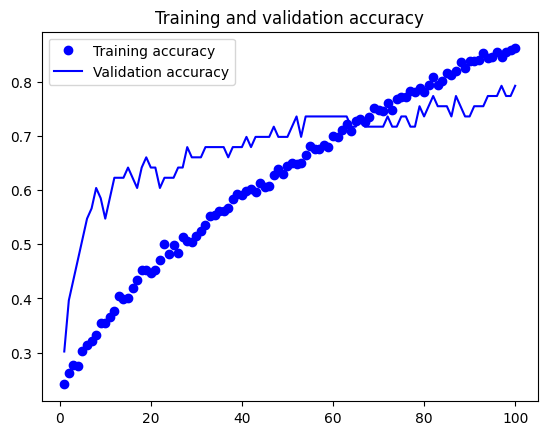

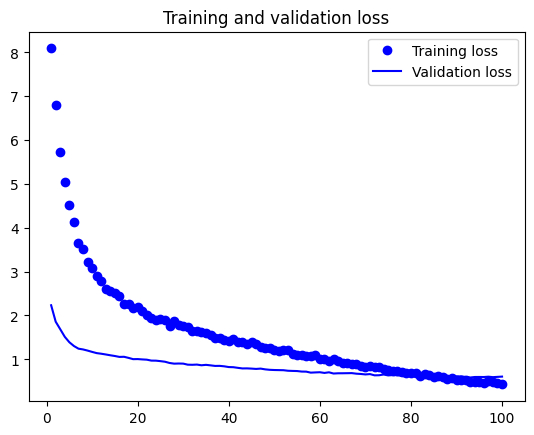

In [223]:
import matplotlib.pyplot as plt
accuracy = final.history["accuracy"]
val_accuracy = final.history["val_accuracy"]
loss = final.history["loss"]
val_loss = final.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

### D: Model Evaluation

While I monitored accuracy on the test set, I was mostly focused on the classification report, and confusion matrix. This is due to the fact that it was most important for my application that all classes were correctly classified. This was specifically a challenge in balancing the class weights where class 3 would underperform greatly. Adjusting the class_weights_dict slightly would cause great impacts in the classification of other classes. Keeping in mind overall class accuracy, the final class_weight_dict = {0: 1.1, 1: 1, 2: 1.1, 3: 1.75}, increased dropout, and increased fine-tuning created a polished model. This model evaluated at 84% on the test set and creating uniform classification statistics. 

Additionally, I focused on reducing overfitting for this model as the training set continued to increase to very high percentages >90%, while the validation set accuracy struggled to get >80%. I found the visualizations displaying accuracy, loss plots, and monitoring the training epochs was very useful in observing overfitting. While I did not find a way to eliminate this overfitting in training completely, I am very proud of the results I obtained on this model.

**Retake**: There is still that initial validation accuracy surge from ~25% to ~60% within the first 10–20 epochs, illustrating the importance of DenseNet121’s feature reuse. Additionally, the gap between training and validation lines are significantly narrower than in the non-augmented iteration demonstrating that augmentations preventing the dense model from overfitting. The training loss dots indicating smooth movements towards the gradient.

According to the classification report and confusion matrix, there is very balanced class performance with all F₁-scores between 0.76 and 0.83, ensuring no category is neglected. Whil there are not significant improvements when it comes to evaluation, this final model is much more applicable to my use-case. I have utilized the larger data set as seen in augmentation to increase generalization and reduce overfitting to the small data set. Additionally, the subtle features within my nuanced classes were detected due to the feature reuse seen in the transfer learning model. In combining these steps, I have created a final model achieving 80+% accuracy with much more consistent results among classes. While improvements can be made (data set), this final iteration model is very successful in detecting features and making accurate classifications for nail deficiencies. 

In [224]:
model_final.evaluate(X_final_test, y_final_test_onehot)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7991 - loss: 0.7128


[0.7062574625015259, 0.7924528121948242]

2/2 ━━━━━━━━━━━━━━━━━━━━ 17s 8s/step
              precision    recall  f1-score   support

           0       0.80      0.73      0.76        11
           1       0.69      1.00      0.81        11
           2       0.81      0.72      0.76        18
           3       0.91      0.77      0.83        13

    accuracy                           0.79        53
   macro avg       0.80      0.80      0.79        53
weighted avg       0.81      0.79      0.79        53



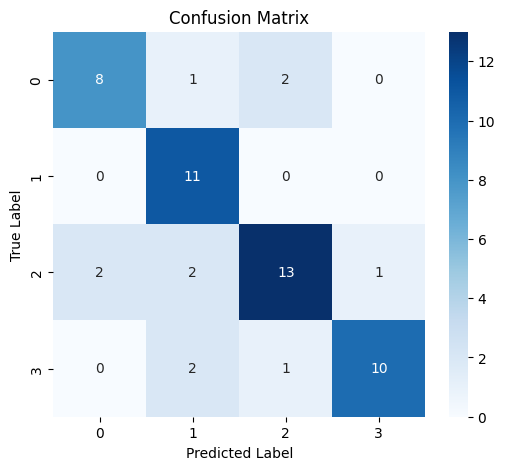

In [225]:
from sklearn.metrics import classification_report
import numpy as np

# Get predictions
y_pred = model_final.predict(X_final_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert to class labels
y_true_classes = np.argmax(y_final_test_onehot, axis=1)  # Convert test labels to class indices

# Print detailed classification report
print(classification_report(y_true_classes, y_pred_classes))
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(4), yticklabels=range(4))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

I feel very comfortable, proud, and excited to move onto error analysis. I believe I stretched machine learnings ability on the data set! While additional fine-tuning and continuous testing may increase performance, I believe these increases could lead to worse generalization. 

In examining there are some inconsistencies in the data I created. While a diverse data set is important, some instances could be labeled as bad data with the image being too blurry and pixelated. Through this strong model, I believe these clear instances of bad data will be highlighted, and I will be shown why it is impossible to push this model performance any higher. 

I am very happy with the work I have done, as in each iteration I have improved on the effectiveness of my models through with strong focus of my business objectives. 

Overall the combination of Transfer Learning and Data Augmentation received the best results for my use case due to the small dataset size and subtle feature importance. Data augmentation increased generalizability and transfer learning created a deep, complex model that could pick up on the nuanced details in nails without immense overfitting.

## Task 3.7: Error Analysis

### A: Wrong Classifications

In [205]:
# Add your code identify and display the misclassified images of your best model

# Get predictions on the test set
predictions = model_final.predict(X_final_test)

# The output of the model and the y labels are arrays of 
# 3 elements (e.g.: [0, 0, 1]). To compare them, we can 
# use the argmax function to get the index of the maximum 
# value in the array.
predicted_labels = np.argmax(predictions, axis=1)
actual_labels = np.argmax(y_final_test_onehot, axis=1)

# Find instances where predictions do not match labels
mismatches = np.where(predicted_labels != actual_labels)[0]

# Store the wrong predictions
wrong_predictions = X_final_test[mismatches]

# Now you can now analyze 'wrong_predictions' for error analysis
print("The model incorrectly predicted", len(wrong_predictions), "out of", len(X_final_test))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
The model incorrectly predicted 14 out of 53


In [206]:
pred_encoded = []
for i in predicted_labels:
    if i == 0:
        pred_encoded.append("biotin")
    if i == 1:
        pred_encoded.append("healthy")
    if i == 2:
        pred_encoded.append("iron")
    if i == 3:
        pred_encoded.append("zinc")

act_encoded = []
for i in actual_labels:
    if i == 0:
        act_encoded.append("biotin")
    if i == 1:
        act_encoded.append("healthy")
    if i == 2:
        act_encoded.append("iron")
    if i == 3:
        act_encoded.append("zinc")

In [207]:
mismatch_info = []
for i in mismatches:
    mismatch_info.append({
        "predicted": pred_encoded[i],
        "actual": act_encoded[i]
    })

In [208]:
mismatch_info

[{'predicted': 'biotin', 'actual': 'iron'},
 {'predicted': 'zinc', 'actual': 'iron'},
 {'predicted': 'healthy', 'actual': 'iron'},
 {'predicted': 'biotin', 'actual': 'iron'},
 {'predicted': 'healthy', 'actual': 'zinc'},
 {'predicted': 'zinc', 'actual': 'iron'},
 {'predicted': 'healthy', 'actual': 'iron'},
 {'predicted': 'healthy', 'actual': 'iron'},
 {'predicted': 'iron', 'actual': 'biotin'},
 {'predicted': 'healthy', 'actual': 'iron'},
 {'predicted': 'iron', 'actual': 'zinc'},
 {'predicted': 'biotin', 'actual': 'zinc'},
 {'predicted': 'healthy', 'actual': 'biotin'},
 {'predicted': 'biotin', 'actual': 'iron'}]

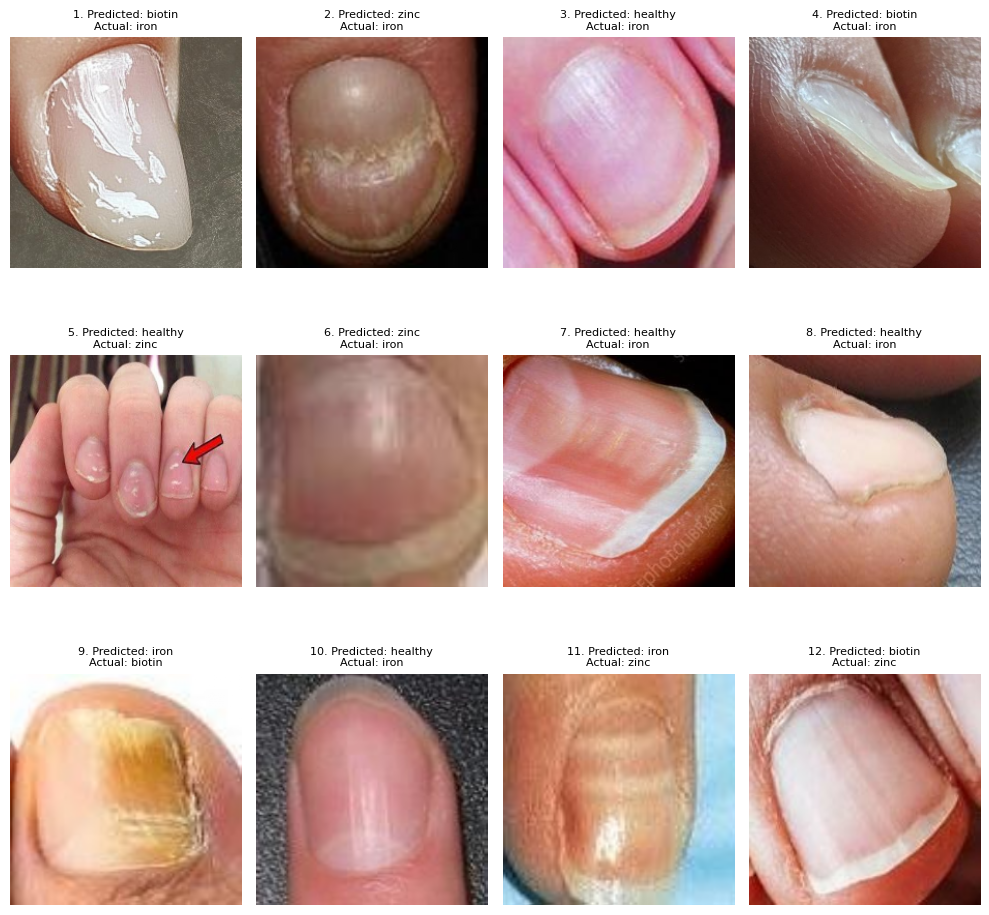

In [209]:
import matplotlib.pyplot as plt
import math

num_images = len(wrong_predictions)
grid_size = int(math.ceil(math.sqrt(num_images)))

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 10))
axes = axes.flatten()

for idx, ax in enumerate(axes):
    if idx < num_images:
        ax.imshow(wrong_predictions[idx])
        ax.axis("off")
        # Add numbering along with predicted and actual values in the title
        info = mismatch_info[idx]
        ax.set_title(f"{idx+1}. Predicted: {info['predicted']}\nActual: {info['actual']}", fontsize=8)
    else:
        ax.axis("off")

plt.tight_layout()
plt.show()

### B: Identify Error Types

[Carefully examine the misclassified images and describe the possible errors that could be the cause of the misclassifications here]

Labeling Error (1 occurence):
Error: Image 1 (Predicted: biotin → Actual: iron)
Explanation:  The nail is glossy and painted with nail polish, obscuring any visible symptoms of nutrient deficiency. This represents a labeling mistake rather than a model error and should be remove to increase dataset quality. 

Inter-Class Similarity (6 occurrences): 
Errors: Image 2, Image 4, Image 6, Image 7, Image 8, and Image 12.
Explanation: Most frequent error; indicates high visual similarity between nutrient deficiencies. Accurate diagnosis is critical as misclassifications due to similar visual symptoms can severely impact user trust and reliability.

1) Image 2 (Predicted: zinc → Actual: iron) and Image 4 (Predicted: iron → Actual: zinc) show horizontal ridges and irregular textures, characteristic of both zinc deficiency horizontal white bands (Beau’s lines) or ridges (visible lines or dents), and iron deficiencies' thin, ridged nails that can also have similar horizontal irregularities.

2) Image 6 (Predicted: biotin → Actual: iron) has brittle, damaged nails, a hallmark of biotin deficiency. However, this same brittlenes can also be found in iron nails. Additionally, the rough texture, irregular ridges, and concave shape, strongly resemble iron deficiency, causing confusion (this image is of semi-low quality).

3) Image 7 (Predicted: iron → Actual: zinc) has horizontal banding and discoloration, indicative of zinc deficiency, but also shares ridged and brittle texture common in iron deficiency nails. (This image is granulated and has lighting errors that could've caused misclassification)

4) Image 8 (Predicted: healthy → Actual: zinc) This nail image contains ridges which are present in zinc deficiency. This is a very subtle characteristic and is important that my model correctly classify instancers like this. 

5) Image 10 (Predicted: iron → Actual: biotin) This nail is has peeling (common in iron deficiency) and is brittle (found in both biotin and iron). This is a very hard instance to classify, however, the overarching brittleness along the nail fold indicate clear biotin deficiency.

5) Image 12 (Predicted: biotin → Actual: zinc) contains visible white spots (commonly linked to zinc deficiency), but also brittle and peeling nail features, closely associated with biotin deficiency. (This image has low image quality which could cause misclassification).


Intra-Class Variability (1 occurrence):
Errors: Image 11 (Predicted: iron → Actual: biotin)
Explanation: Variability within classes is high, especially within the biotin deficiency class, leading the model to confusion. Biotin can be seen as brittle or weak nails that are slow in growth. On the other end of the skectrum, biotin deficiency can be seen with severe nail brittleness with prounoced splits and even in some cases nail dystrophy. Nail dystrophy is seen as significant structural abnormalities such as thickening, discoloration, or unusual nail shape.


Image Quality and Noise (3 occurrences):
Errors: Image 9 (poor quality), Image 11 (noise), Image 12 (poor quality) 
Explanation: Poor image resolution and excessive texture/noise obscured defining features.
1) Image 9 (Predicted: iron → Actual: Biotin): This is impossible to classify due to low image resolution. There seems to be both visable whitespots, brittle features, and splitting of the nail. This means this nail could be classified in each deficiency class due to low resolution; equating the model to random guess.
2) Image 11 (Predicted: iron → Actual: Biotin): This instance contains a watermark. This might cause the model to learn insigicant features. The watermark, which could be a part of the consideration in which the model learns patterns, should be removed due. (intra-class variability is more likely cause of misclassification)
3) Image 12 (Predicted: biotin → Actual: zinc): This image is pixelated and low quality which may of caused misclassification (inter-class similarity is more likely cause of misclassification).


Pose and Orientation Variability (1 occurrence):
Error: Image 5 (Predicted: healthy → actual: zinc) (multiple nails visible, different pose).
Explanation: Model trained mostly (~100%) on images focused closely on a single nail while this image contains a full hand with four nails included. The features the model has been trained on does not apply/would be very hard to apply to this instance. Cropping or removing this image is necessary.


Lighting and Exposure Issues (2 occurrences):
Errors: Image 3 (Predicted: healthy → Actual: iron), Image 7 (Predicted: iron → Actual: zinc)
Explanation: Bright exposure might have masked distinguishing features like texture or discoloration.
Note: Could also be seen in 2, 4, and 10 while the exposure issues are much less severe. These are important instances so the model is trained on more cases like this where users submit images 

### C: Categorize Errors

Labeling Error: 1 → 8.3% (1/12)

Inter-Class Similarity:	6 → 50.0% (6/12)

Intra-Class Variability: 1 → 8.3% (1/12)

Image Quality and Noise: 3 → 25.0% (3/12)

Pose and Orientation Variability 1 → 8.3% (1/12)

Lighting and Exposure Issues: 2 → 16.7% (2/12)

(Percentages total more than 100% because some images exhibit multiple types of errors).

### D: Propose Improvements

[Based on the quantitative analysis of the errors, formulate hypotheses about why these errors occurred. Then, suggest and discuss potential improvements for the model and/or dataset]


Inter-Class Similarity is clearly the most common issue (50%), suggesting the need for clearer differentiation and additional examples to train the model.

Image Quality and Noise also significantly impacted accuracy (25%), emphasizing the importance of high-quality images.

Other issues like Labeling Errors, Intra-Class Variability, Pose and Orientation, and Lighting Issues individually contribute less but collectively highlight areas for refinement.

By addressing the dominant error categories: Inter-Class Similarity and Image Quality, I can significantly enhance model accuracy, aligning with my application's goal of reliable medical classification.

Hypotheses:



*1* Inter-Class Similarity (50% of errors)
Hypothesis:
The high amount of instances seen in this error type makes it the focus of my model refinement as errors could occur due to a variety of reasons:
1) High similarity between nutrient deficiencies (zinc, iron, biotin) likely causes confusion due to visually overlapping symptoms such as brittleness, ridges, white spots, and discoloration. 
2) The model currently struggles to differentiate subtle but critical diagnostic features seen in the image 8 misclassification. It is very important the model is able to classify subtle deficiencies because these are early stages of the more severe cases (catching these cases would decrease the amount of severe cases).
3) Incorrect labeling (data processing errors)
4) Multi-Class instances (Ex. a person is deficient in iron and biotin)
5) Non-representative data. The misclassification shown such as image 8 illustrate that it is essential the model is trained on a larger data set. It is most essential the model must be able to be applied to subtle nail deficiencies (reasoned above), aswell as elderly users (target market) due to their increased likelyhood of becoming deficient. (It is impossible to detect if a nail originates from a pregnant individual (another target of the applicaton)).

Regardless, it is essential that my model is able to clearly distinguish between categories, with the ability to be applied to all use cases, because providing a user with a incorrect diagnoses could lead to more harm. For example, a user who iron deficient, but was incorrectly diagnosed as zinc deficient could begin to take a zinc supplement. The user trusted the application and believes that taking this supplement is improving their health. Unfortunately, this would not only cause the zinc deficiency to increase in severity (hair loss, eye problems, etc.), but additionally due to the application, overconsumption of iron has the ability to inflict severe damage, even leading to organ failure. This example illustrates immense damaging effects, and importance of correctly classifying inter-class similarity images. Due to the trust in accuracy of this application, instances like this would cause greater health problems (what this application aims to decrease).


2. Image Quality and Noise (25% of errors)
Poor image quality, pixelation, noise, or the presence of watermarks obscure essential visual details required for accurate classification, significantly impacting model performance. 

Hypothesis:
These are likely due to data cleaning errors. It is essential in small data sets like this are inspected thoroughly making sure there is no noise in the dataset. While it is essential that the model is able to predict all instances, photos that the application will recieve (due to instruction within the application) will be normalized (no presence of watermarks). While it is important that the model is able to correctly classify lower quality photos, it is very rare that a person who is able to use the application will submit a photo of such low quality (image 9) that it cannot be classified. When a nutrient deficiency can no longer be classified by human detection (expert), it is impossible to expect a machine to.

3. Lighting and Exposure Issues (16.7% of errors)
Inconsistent or extreme lighting conditions hinder the model's ability to detect key visual indicators such as color variations and textural details, causing misclassification. 

Hypothesis: It is to be expected that users will often submit images with lighting issues, however, it is believable that lighting errors such as image 7 would be avoided. In the application, the user is shown the image before their final submission. Instructions on how the image will work should reduce the presence of instances like this. It is important that the model is able to correctly predict instances with minor lighting variation.

Solution: Increasing lighting effects in data augmentation or increasing data set size.


4. Pose and Orientation Variability (8.3% of errors)
Hypothesis:
The model's limited exposure to varied poses or multiple nails in one image causes confusion when presented with images differing from the standard, focused single-nail close-up format. This is a data cleaning error.

5. Intra-Class Variability (8.3% of errors)
Hypothesis:
High variation within certain classes (particularly biotin deficiency) indicates inadequate representation of all symptom variants in training data, leading to difficulty in correctly generalizing. A larger data set would solve this issue, with more wholistic views on the deficiencies. The data set is too small to be fully representative.

6. Labeling Errors (8.3% of errors)
Hypothesis:
Mislabeling introduces confusion during training, negatively impacting model accuracy and reducing trust in predictions. This is a data cleaning error.

**Solutions**

1) Increase Class Differentiation:

Collect additional clearly differentiated images, emphasizing unique features per deficiency class. This could include explicit annotations or segmentation highlighting subtle distinguishing features like spoon-shape (iron), white spots (zinc), and brittle/peeling nails (biotin).

2) Enhance Image Quality Standards:

Establish stricter quality control measures, removing low-quality, noisy, pixelated images or those containing watermarks from the dataset. Include image preprocessing steps (e.g., noise reduction, resolution enhancement) to uniformly enhance image clarity before training.

3) Diversify Image Conditions: 

Collect and incorporate images with varied lighting, exposure, and poses to improve model robustness. Clearly define image guidelines (e.g., standardizing single nail, clear lighting, no polish) for consistent user submissions in your final product. Incease data augmentation to creeate a more diverse set of instances.

4) Address Class Variability: 

Collect additional biotin deficiency images showcasing the entire spectrum from mild brittleness to severe deformities to fully represent class variability. Annotate distinct subtypes or severity levels within classes to guide the model better.

5) Model Improvements:

Advanced Model Architecture & Fine-Tuning: Experiment with deeper CNN architectures or ensemble models to improve subtle feature extraction capability. Use fine-tuning techniques from medically relevant pre-trained models to enhance learning of nuanced diagnostic features.

5) Regularization and Augmentation:

Implement data augmentation techniques specifically targeted at addressing identified errors (brightness variation, rotation, scale adjustments). Utilize regularization methods like dropout or batch normalization to reduce overfitting to certain superficial image features.

6) Incorporate Explainable AI (XAI):

Use techniques like Grad-CAM to understand model decisions better, identify where misclassifications occur, and adjust data or model architecture accordingly. This would be useful addition, also increasing trust by showcasing XAI within the model (showing how the model classified the users specific image).

Overall, by systematically addressing these hypotheses and following the proposed dataset and model improvements, my nail nutrient deficiency classifier will significantly improve accuracy, reduce bias, enhance reliability, and ultimately better meet your application's business objectives of providing accurate, transparent, and user-friendly medical insights.
